# Main with Semi major axis  
Dimensions used: Inclination, raan, semi major axis  
Files: clustering_utils_a.py, cluster_data_a.py

## KMeans with different k: Test with crossing data
KMeans normal bins and running bins

In [1]:
import cluster_data_a
from cluster_data_a import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
from kmeans import k_means
from cluster_plotter import ClusterPlotter
from clustering_utils_a import ClusterData
import cluster_plotter

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_a.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_a.bin_data_for_clustering(running_ranges, print_res=False)

k_values = [3, 4, 5, 6, 7]

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\k_means_tests_running_bins_a"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning K-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.sem_maj]).T
    feature_names = ["inclination [°]", "RAAN [°]", "semi major axis [km]"]


    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_kmeans, time_kmeans, n_clusters_kmeans, points_per_cluster_kmeans, metrics_kmeans = run_clustering(
            k_means, f"K-means (k={k})", normalized_data, data_min, data_max, k, plot=False, init='kmeans++'
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_kmeans.data, result_kmeans.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_kmeans.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"kmeans_{year_range}_k{k}.png")
        title = f"k-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names, reverse_third_axis=True)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_kmeans[4].items()}
        #rounded_square_density = {key: round(value, 3) for key, value in metrics_kmeans[5].items()}
        #rounded_hull_density = {key: round(value, 3) for key, value in metrics_kmeans[6].items()}

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_kmeans:.3f}",
            "Clusters": n_clusters_kmeans,
            "Points per Cluster": points_per_cluster_kmeans,
            "Davies-Bouldin": f"{metrics_kmeans[0]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_kmeans[1]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[1], (int, float)) else None,
            "Dunn Index": f"{metrics_kmeans[2]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_kmeans[3]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None 
        })

    df = pd.DataFrame(results)
    display(df)
    print(binned_data)

<>:25: SyntaxWarning: invalid escape sequence '\k'
<>:25: SyntaxWarning: invalid escape sequence '\k'
C:\Users\fionu\AppData\Local\Temp\ipykernel_15424\2341360362.py:25: SyntaxWarning: invalid escape sequence '\k'
  plot_dir = "Images\k_means_tests_running_bins_a"



Running K-Means for Year Range: 2002-2005
Runtime for k_means: 0.015946 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2002-2005_k3.png
Runtime for k_means: 0.003001 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2002-2005_k4.png
Runtime for k_means: 0.047809 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2002-2005_k5.png
Runtime for k_means: 0.047177 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2002-2005_k6.png
Runtime for k_means: 0.253314 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2002-2005_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,3,0.016,3,"{0: 4358, 1: 1362, 2: 2317}",0.587,15782.524,0.008,0.464,"{0: (0.036, 0.066, 0.104), 1: (0.084, 0.104, 0..."
1,2002-2005,4,0.003,4,"{0: 2310, 1: 1474, 2: 1353, 3: 2900}",0.769,12511.598,0.002,0.416,"{0: (0.083, 0.09, 0.135), 1: (0.036, 0.082, 0...."
2,2002-2005,5,0.048,5,"{0: 4164, 1: 1005, 2: 1586, 3: 1075, 4: 207}",0.688,13334.254,0.006,0.593,"{0: (0.03, 0.062, 0.072), 1: (0.083, 0.101, 0...."
3,2002-2005,6,0.047,6,"{0: 1001, 1: 956, 2: 2902, 3: 771, 4: 989, 5: ...",0.950,11520.571,0.002,0.445,"{0: (0.083, 0.102, 0.105), 1: (0.058, 0.076, 0..."
4,2002-2005,7,0.253,7,"{0: 1410, 1: 745, 2: 2769, 3: 188, 4: 1414, 5:...",0.905,11629.075,0.003,0.456,"{0: (0.057, 0.072, 0.091), 1: (0.07, 0.083, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2003-2006_k3.png
Runtime for k_means: 0.016225 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2003-2006_k4.png
Runtime for k_means: 0.047246 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2003-2006_k5.png
Runtime for k_means: 0.101077 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2003-2006_k6.png
Runtime for k_means: 0.110219 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2003-2006_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,3,0.032,3,"{0: 5200, 1: 2226, 2: 1453}",0.626,15335.813,0.007,0.453,"{0: (0.036, 0.058, 0.11), 1: (0.094, 0.101, 0...."
1,2003-2006,4,0.016,4,"{0: 5105, 1: 100, 2: 2221, 3: 1453}",0.615,10932.584,0.008,0.485,"{0: (0.033, 0.036, 0.11), 1: (0.046, 0.059, 0...."
2,2003-2006,5,0.047,5,"{0: 1420, 1: 3009, 2: 154, 3: 2189, 4: 2107}",0.865,10620.181,0.002,0.493,"{0: (0.074, 0.102, 0.144), 1: (0.019, 0.035, 0..."
3,2003-2006,6,0.101,6,"{0: 1374, 1: 5191, 2: 1001, 3: 1131, 4: 73, 5:...",0.783,9435.387,0.008,0.609,"{0: (0.051, 0.088, 0.099), 1: (0.032, 0.057, 0..."
4,2003-2006,7,0.110,7,"{0: 2881, 1: 1005, 2: 990, 3: 227, 4: 613, 5: ...",0.885,11368.210,0.003,0.465,"{0: (0.03, 0.036, 0.05), 1: (0.09, 0.096, 0.10..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2004-2007_k3.png
Runtime for k_means: 0.031818 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2004-2007_k4.png
Runtime for k_means: 0.108349 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2004-2007_k5.png
Runtime for k_means: 0.042274 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2004-2007_k6.png
Runtime for k_means: 0.083863 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2004-2007_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,3,0.014,3,"{0: 1957, 1: 1028, 2: 5564}",0.651,12842.813,0.007,0.461,"{0: (0.091, 0.097, 0.145), 1: (0.1, 0.115, 0.1..."
1,2004-2007,4,0.032,4,"{0: 1014, 1: 1950, 2: 2536, 3: 3049}",0.718,11257.662,0.004,0.409,"{0: (0.099, 0.102, 0.143), 1: (0.091, 0.096, 0..."
2,2004-2007,5,0.108,5,"{0: 2536, 1: 3043, 2: 1181, 3: 1028, 4: 761}",0.836,11295.131,0.004,0.480,"{0: (0.031, 0.048, 0.097), 1: (0.03, 0.044, 0...."
3,2004-2007,6,0.042,6,"{0: 5341, 1: 240, 2: 1109, 3: 387, 4: 735, 5: ...",0.923,8950.114,0.009,0.573,"{0: (0.035, 0.051, 0.083), 1: (0.034, 0.063, 0..."
4,2004-2007,7,0.084,7,"{0: 821, 1: 2525, 2: 148, 3: 595, 4: 860, 5: 5...",0.892,9990.032,0.003,0.463,"{0: (0.055, 0.067, 0.085), 1: (0.031, 0.047, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2005-2008_k3.png
Runtime for k_means: 0.033982 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2005-2008_k4.png
Runtime for k_means: 0.051929 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2005-2008_k5.png
Runtime for k_means: 0.076126 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2005-2008_k6.png
Runtime for k_means: 0.083269 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2005-2008_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,3,0.036,3,"{0: 1652, 1: 5104, 2: 865}",0.674,10957.510,0.007,0.461,"{0: (0.091, 0.095, 0.145), 1: (0.038, 0.051, 0..."
1,2005-2008,4,0.034,4,"{0: 1617, 1: 2772, 2: 888, 3: 2344}",0.714,9831.538,0.002,0.417,"{0: (0.09, 0.096, 0.142), 1: (0.031, 0.045, 0...."
2,2005-2008,5,0.052,5,"{0: 2344, 1: 603, 2: 984, 3: 922, 4: 2768}",0.815,9967.155,0.003,0.495,"{0: (0.029, 0.036, 0.091), 1: (0.095, 0.098, 0..."
3,2005-2008,6,0.076,6,"{0: 2345, 1: 2732, 2: 602, 3: 937, 4: 118, 5: ...",0.767,9603.441,0.003,0.507,"{0: (0.029, 0.036, 0.091), 1: (0.019, 0.036, 0..."
4,2005-2008,7,0.083,7,"{0: 2345, 1: 559, 2: 2732, 3: 48, 4: 106, 5: 9...",0.769,8432.763,0.003,0.509,"{0: (0.029, 0.036, 0.091), 1: (0.061, 0.091, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2006-2009_k3.png
Runtime for k_means: 0.029002 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2006-2009_k4.png
Runtime for k_means: 0.027584 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2006-2009_k5.png
Runtime for k_means: 0.093027 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2006-2009_k6.png
Runtime for k_means: 0.076036 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2006-2009_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,3,0.033,3,"{0: 1404, 1: 952, 2: 5123}",0.732,10111.277,0.006,0.452,"{0: (0.094, 0.112, 0.138), 1: (0.096, 0.106, 0..."
1,2006-2009,4,0.029,4,"{0: 5109, 1: 806, 2: 965, 3: 599}",0.830,8645.820,0.004,0.521,"{0: (0.036, 0.046, 0.101), 1: (0.087, 0.097, 0..."
2,2006-2009,5,0.028,5,"{0: 5072, 1: 596, 2: 959, 3: 87, 4: 765}",0.797,7201.011,0.005,0.603,"{0: (0.031, 0.042, 0.102), 1: (0.097, 0.105, 0..."
3,2006-2009,6,0.093,6,"{0: 2460, 1: 402, 2: 210, 3: 799, 4: 2657, 5: ...",0.999,7917.992,0.004,0.493,"{0: (0.028, 0.032, 0.071), 1: (0.044, 0.104, 0..."
4,2006-2009,7,0.076,7,"{0: 772, 1: 2597, 2: 589, 3: 89, 4: 87, 5: 239...",0.733,7907.428,0.001,0.524,"{0: (0.083, 0.093, 0.099), 1: (0.026, 0.044, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2007-2010_k3.png
Runtime for k_means: 0.050685 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2007-2010_k4.png
Runtime for k_means: 0.021398 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2007-2010_k5.png
Runtime for k_means: 0.037664 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2007-2010_k6.png
Runtime for k_means: 0.072823 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2007-2010_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,3,0.013,3,"{0: 684, 1: 4032, 2: 970}",0.761,7057.552,0.009,0.453,"{0: (0.095, 0.115, 0.155), 1: (0.038, 0.051, 0..."
1,2007-2010,4,0.051,4,"{0: 942, 1: 108, 2: 641, 3: 3995}",0.761,5702.860,0.012,0.559,"{0: (0.065, 0.121, 0.14), 1: (0.122, 0.136, 0...."
2,2007-2010,5,0.021,5,"{0: 1937, 1: 600, 2: 669, 3: 2088, 4: 392}",0.813,6526.626,0.003,0.513,"{0: (0.026, 0.028, 0.062), 1: (0.085, 0.095, 0..."
3,2007-2010,6,0.038,6,"{0: 3992, 1: 453, 2: 387, 3: 85, 4: 142, 5: 627}",0.936,4372.600,0.005,0.609,"{0: (0.03, 0.043, 0.1), 1: (0.04, 0.091, 0.096..."
4,2007-2010,7,0.073,7,"{0: 1886, 1: 1870, 2: 208, 3: 612, 4: 108, 5: ...",0.765,5197.313,0.003,0.499,"{0: (0.019, 0.027, 0.06), 1: (0.017, 0.028, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2008-2011_k3.png
Runtime for k_means: 0.021781 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2008-2011_k4.png
Runtime for k_means: 0.025996 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2008-2011_k5.png
Runtime for k_means: 0.068785 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2008-2011_k6.png
Runtime for k_means: 0.036781 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2008-2011_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,3,0.024,3,"{0: 2809, 1: 656, 2: 599}",0.782,4893.463,0.009,0.437,"{0: (0.029, 0.052, 0.099), 1: (0.1, 0.131, 0.1..."
1,2008-2011,4,0.022,4,"{0: 1479, 1: 597, 2: 1331, 3: 657}",0.723,4525.830,0.002,0.432,"{0: (0.032, 0.035, 0.048), 1: (0.094, 0.114, 0..."
2,2008-2011,5,0.026,5,"{0: 359, 1: 2772, 2: 327, 3: 522, 4: 84}",0.743,3995.335,0.011,0.625,"{0: (0.086, 0.098, 0.121), 1: (0.028, 0.029, 0..."
3,2008-2011,6,0.069,6,"{0: 1427, 1: 629, 2: 574, 3: 323, 4: 89, 5: 1022}",0.792,3691.494,0.001,0.460,"{0: (0.03, 0.035, 0.046), 1: (0.088, 0.11, 0.1..."
4,2008-2011,7,0.037,7,"{0: 309, 1: 32, 2: 1305, 3: 1476, 4: 50, 5: 39...",0.807,3977.024,0.003,0.545,"{0: (0.045, 0.097, 0.101), 1: (0.1, 0.117, 0.1..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2009-2012_k3.png
Runtime for k_means: 0.022046 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2009-2012_k4.png
Runtime for k_means: 0.024122 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2009-2012_k5.png
Runtime for k_means: 0.076573 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2009-2012_k6.png
Runtime for k_means: 0.024518 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2009-2012_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,3,0.026,3,"{0: 1104, 1: 1388, 2: 1068}",0.700,2643.185,0.003,0.269,"{0: (0.017, 0.038, 0.052), 1: (0.043, 0.052, 0..."
1,2009-2012,4,0.022,4,"{0: 2433, 1: 57, 2: 565, 3: 505}",0.897,3210.753,0.010,0.531,"{0: (0.025, 0.056, 0.101), 1: (0.107, 0.147, 0..."
2,2009-2012,5,0.024,5,"{0: 461, 1: 1326, 2: 314, 3: 1104, 4: 355}",0.800,4011.485,0.002,0.529,"{0: (0.074, 0.089, 0.101), 1: (0.034, 0.037, 0..."
3,2009-2012,6,0.077,6,"{0: 2390, 1: 232, 2: 86, 3: 345, 4: 288, 5: 219}",0.961,3038.544,0.007,0.592,"{0: (0.026, 0.026, 0.102), 1: (0.085, 0.1, 0.1..."
4,2009-2012,7,0.025,7,"{0: 300, 1: 1075, 2: 438, 3: 293, 4: 1315, 5: ...",0.722,4585.826,0.003,0.567,"{0: (0.074, 0.084, 0.1), 1: (0.014, 0.026, 0.0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2010-2013_k3.png
Runtime for k_means: 0.008553 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2010-2013_k4.png
Runtime for k_means: 0.012998 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2010-2013_k5.png
Runtime for k_means: 0.014412 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2010-2013_k6.png
Runtime for k_means: 0.018414 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2010-2013_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,3,0.006,3,"{0: 1121, 1: 38, 2: 420}",1.076,1002.275,0.071,0.407,"{0: (0.025, 0.087, 0.107), 1: (0.114, 0.154, 0..."
1,2010-2013,4,0.009,4,"{0: 522, 1: 604, 2: 263, 3: 190}",0.799,1552.976,0.008,0.417,"{0: (0.024, 0.05, 0.123), 1: (0.032, 0.043, 0...."
2,2010-2013,5,0.013,5,"{0: 1100, 1: 107, 2: 32, 3: 189, 4: 151}",0.819,1228.880,0.007,0.606,"{0: (0.025, 0.063, 0.106), 1: (0.072, 0.096, 0..."
3,2010-2013,6,0.014,6,"{0: 599, 1: 108, 2: 203, 3: 140, 4: 480, 5: 49}",0.691,1803.745,0.008,0.567,"{0: (0.033, 0.043, 0.052), 1: (0.087, 0.103, 0..."
4,2010-2013,7,0.018,7,"{0: 479, 1: 49, 2: 130, 3: 187, 4: 108, 5: 595...",0.689,1974.813,0.009,0.580,"{0: (0.016, 0.026, 0.054), 1: (0.01, 0.039, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2011-2014_k3.png
Runtime for k_means: 0.007491 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2011-2014_k4.png
Runtime for k_means: 0.009523 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2011-2014_k5.png
Runtime for k_means: 0.009454 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2011-2014_k6.png
Runtime for k_means: 0.009138 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2011-2014_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,3,0.010,3,"{0: 594, 1: 150, 2: 122}",0.959,666.500,0.017,0.362,"{0: (0.03, 0.045, 0.144), 1: (0.093, 0.163, 0...."
1,2011-2014,4,0.007,4,"{0: 588, 1: 32, 2: 138, 3: 108}",0.818,596.639,0.019,0.450,"{0: (0.025, 0.029, 0.143), 1: (0.043, 0.067, 0..."
2,2011-2014,5,0.010,5,"{0: 91, 1: 335, 2: 259, 3: 61, 4: 120}",0.935,713.772,0.016,0.550,"{0: (0.072, 0.147, 0.255), 1: (0.021, 0.033, 0..."
3,2011-2014,6,0.009,6,"{0: 241, 1: 285, 2: 122, 3: 65, 4: 98, 5: 55}",0.999,633.439,0.007,0.394,"{0: (0.022, 0.052, 0.139), 1: (0.024, 0.054, 0..."
4,2011-2014,7,0.009,7,"{0: 336, 1: 253, 2: 114, 3: 51, 4: 33, 5: 59, ...",0.708,995.874,0.019,0.603,"{0: (0.021, 0.034, 0.065), 1: (0.015, 0.029, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2012-2015_k3.png
Runtime for k_means: 0.009294 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2012-2015_k4.png
Runtime for k_means: 0.009284 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2012-2015_k5.png
Runtime for k_means: 0.014205 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2012-2015_k6.png
Runtime for k_means: 0.009305 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2012-2015_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,3,0.005,3,"{0: 269, 1: 296, 2: 305}",0.970,694.842,0.018,0.225,"{0: (0.046, 0.057, 0.16), 1: (0.093, 0.111, 0...."
1,2012-2015,4,0.009,4,"{0: 564, 1: 83, 2: 124, 3: 99}",0.895,743.117,0.022,0.413,"{0: (0.028, 0.11, 0.126), 1: (0.105, 0.118, 0...."
2,2012-2015,5,0.009,5,"{0: 358, 1: 95, 2: 17, 3: 209, 4: 191}",0.917,740.925,0.006,0.436,"{0: (0.032, 0.055, 0.142), 1: (0.05, 0.103, 0...."
3,2012-2015,6,0.014,6,"{0: 121, 1: 305, 2: 259, 3: 82, 4: 94, 5: 9}",0.923,732.211,0.023,0.432,"{0: (0.053, 0.08, 0.092), 1: (0.021, 0.034, 0...."
4,2012-2015,7,0.009,7,"{0: 81, 1: 491, 2: 28, 3: 9, 4: 100, 5: 68, 6:...",0.841,650.632,0.016,0.487,"{0: (0.043, 0.051, 0.072), 1: (0.026, 0.032, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2013-2016_k3.png
Runtime for k_means: 0.012958 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2013-2016_k4.png
Runtime for k_means: 0.009547 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2013-2016_k5.png
Runtime for k_means: 0.018408 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2013-2016_k6.png
Runtime for k_means: 0.009461 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2013-2016_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,3,0.012,3,"{0: 771, 1: 394, 2: 162}",0.787,1251.935,0.018,0.325,"{0: (0.031, 0.119, 0.127), 1: (0.087, 0.106, 0..."
1,2013-2016,4,0.013,4,"{0: 389, 1: 447, 2: 325, 3: 166}",0.899,1165.130,0.006,0.345,"{0: (0.087, 0.102, 0.129), 1: (0.03, 0.055, 0...."
2,2013-2016,5,0.010,5,"{0: 141, 1: 770, 2: 127, 3: 19, 4: 270}",0.968,797.523,0.016,0.467,"{0: (0.048, 0.1, 0.146), 1: (0.03, 0.119, 0.12..."
3,2013-2016,6,0.018,6,"{0: 95, 1: 325, 2: 337, 3: 300, 4: 152, 5: 118}",0.800,1370.756,0.015,0.505,"{0: (0.085, 0.113, 0.153), 1: (0.023, 0.041, 0..."
4,2013-2016,7,0.009,7,"{0: 125, 1: 329, 2: 145, 3: 117, 4: 278, 5: 60...",0.796,1277.910,0.005,0.479,"{0: (0.073, 0.088, 0.107), 1: (0.026, 0.034, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2014-2017_k3.png
Runtime for k_means: 0.059645 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2014-2017_k4.png
Runtime for k_means: 0.044567 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2014-2017_k5.png
Runtime for k_means: 0.018401 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2014-2017_k6.png
Runtime for k_means: 0.014629 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2014-2017_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,3,0.010,3,"{0: 1059, 1: 612, 2: 226}",1.166,1164.639,0.013,0.208,"{0: (0.031, 0.124, 0.139), 1: (0.08, 0.095, 0...."
1,2014-2017,4,0.060,4,"{0: 363, 1: 517, 2: 246, 3: 771}",0.690,1155.690,0.009,0.363,"{0: (0.039, 0.052, 0.075), 1: (0.029, 0.053, 0..."
2,2014-2017,5,0.045,5,"{0: 234, 1: 227, 2: 241, 3: 369, 4: 826}",0.837,1560.054,0.012,0.482,"{0: (0.098, 0.113, 0.143), 1: (0.073, 0.101, 0..."
3,2014-2017,6,0.018,6,"{0: 453, 1: 241, 2: 128, 3: 215, 4: 33, 5: 827}",0.859,1311.252,0.015,0.469,"{0: (0.054, 0.066, 0.139), 1: (0.037, 0.053, 0..."
4,2014-2017,7,0.015,7,"{0: 358, 1: 222, 2: 359, 3: 480, 4: 228, 5: 22...",0.779,1858.852,0.011,0.534,"{0: (0.022, 0.043, 0.074), 1: (0.066, 0.083, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2015-2018_k3.png
Runtime for k_means: 0.017018 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2015-2018_k4.png
Runtime for k_means: 0.007128 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2015-2018_k5.png
Runtime for k_means: 0.017505 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2015-2018_k6.png
Runtime for k_means: 0.005839 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2015-2018_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,3,0.014,3,"{0: 1443, 1: 323, 2: 876}",0.802,2291.231,0.012,0.310,"{0: (0.03, 0.118, 0.137), 1: (0.09, 0.108, 0.1..."
1,2015-2018,4,0.017,4,"{0: 359, 1: 752, 2: 1181, 3: 350}",1.021,1826.717,0.010,0.342,"{0: (0.089, 0.112, 0.153), 1: (0.031, 0.053, 0..."
2,2015-2018,5,0.007,5,"{0: 423, 1: 788, 2: 1143, 3: 56, 4: 232}",0.828,1282.055,0.002,0.478,"{0: (0.034, 0.044, 0.076), 1: (0.024, 0.046, 0..."
3,2015-2018,6,0.018,6,"{0: 764, 1: 586, 2: 421, 3: 325, 4: 269, 5: 277}",0.684,2919.937,0.004,0.564,"{0: (0.025, 0.035, 0.055), 1: (0.032, 0.064, 0..."
4,2015-2018,7,0.006,7,"{0: 571, 1: 40, 2: 270, 3: 310, 4: 421, 5: 267...",0.731,2748.491,0.005,0.570,"{0: (0.029, 0.038, 0.073), 1: (0.096, 0.145, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2016-2019_k3.png
Runtime for k_means: 0.015193 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2016-2019_k4.png
Runtime for k_means: 0.010935 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2016-2019_k5.png
Runtime for k_means: 0.016096 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2016-2019_k6.png
Runtime for k_means: 0.017028 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2016-2019_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,3,0.007,3,"{0: 1497, 1: 865, 2: 348}",0.864,1842.293,0.012,0.274,"{0: (0.031, 0.135, 0.155), 1: (0.078, 0.103, 0..."
1,2016-2019,4,0.015,4,"{0: 338, 1: 419, 2: 870, 3: 1083}",0.855,1882.071,0.008,0.360,"{0: (0.086, 0.097, 0.16), 1: (0.04, 0.059, 0.0..."
2,2016-2019,5,0.011,5,"{0: 414, 1: 627, 2: 1075, 3: 250, 4: 344}",0.837,1860.545,0.010,0.483,"{0: (0.028, 0.056, 0.092), 1: (0.05, 0.054, 0...."
3,2016-2019,6,0.016,6,"{0: 297, 1: 86, 2: 1161, 3: 261, 4: 287, 5: 618}",0.863,1546.893,0.006,0.478,"{0: (0.07, 0.085, 0.153), 1: (0.049, 0.064, 0...."
4,2016-2019,7,0.017,7,"{0: 656, 1: 153, 2: 821, 3: 173, 4: 45, 5: 577...",0.856,1758.191,0.007,0.518,"{0: (0.029, 0.067, 0.181), 1: (0.066, 0.088, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2017-2020_k3.png
Runtime for k_means: 0.016019 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2017-2020_k4.png
Runtime for k_means: 0.008667 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2017-2020_k5.png
Runtime for k_means: 0.014897 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2017-2020_k6.png
Runtime for k_means: 0.022169 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2017-2020_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,3,0.016,3,"{0: 962, 1: 1283, 2: 1046}",1.058,2012.589,0.010,0.215,"{0: (0.034, 0.07, 0.183), 1: (0.099, 0.142, 0...."
1,2017-2020,4,0.016,4,"{0: 1260, 1: 1049, 2: 356, 3: 626}",0.904,2168.901,0.004,0.341,"{0: (0.027, 0.065, 0.163), 1: (0.082, 0.103, 0..."
2,2017-2020,5,0.009,5,"{0: 1506, 1: 385, 2: 318, 3: 744, 4: 338}",0.784,2319.259,0.010,0.522,"{0: (0.026, 0.034, 0.152), 1: (0.034, 0.053, 0..."
3,2017-2020,6,0.015,6,"{0: 742, 1: 905, 2: 347, 3: 606, 4: 380, 5: 311}",0.682,3166.899,0.009,0.575,"{0: (0.051, 0.059, 0.119), 1: (0.022, 0.035, 0..."
4,2017-2020,7,0.022,7,"{0: 606, 1: 64, 2: 382, 3: 289, 4: 705, 5: 342...",0.671,3266.282,0.009,0.587,"{0: (0.024, 0.037, 0.084), 1: (0.097, 0.146, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2018-2021_k3.png
Runtime for k_means: 0.010043 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2018-2021_k4.png
Runtime for k_means: 0.014161 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2018-2021_k5.png
Runtime for k_means: 0.013252 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2018-2021_k6.png
Runtime for k_means: 0.024953 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2018-2021_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,3,0.009,3,"{0: 1702, 1: 1325, 2: 415}",0.734,2568.643,0.004,0.293,"{0: (0.028, 0.07, 0.129), 1: (0.092, 0.123, 0...."
1,2018-2021,4,0.010,4,"{0: 1070, 1: 410, 2: 1258, 3: 704}",0.723,2345.121,0.004,0.376,"{0: (0.033, 0.046, 0.141), 1: (0.045, 0.06, 0...."
2,2018-2021,5,0.014,5,"{0: 406, 1: 293, 2: 985, 3: 682, 4: 1076}",0.692,3175.093,0.002,0.541,"{0: (0.042, 0.059, 0.091), 1: (0.085, 0.124, 0..."
3,2018-2021,6,0.013,6,"{0: 1664, 1: 406, 2: 43, 3: 773, 4: 282, 5: 274}",0.710,2817.069,0.017,0.568,"{0: (0.027, 0.031, 0.122), 1: (0.042, 0.057, 0..."
4,2018-2021,7,0.025,7,"{0: 985, 1: 272, 2: 46, 3: 771, 4: 681, 5: 281...",0.674,3715.678,0.003,0.568,"{0: (0.023, 0.031, 0.053), 1: (0.063, 0.083, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2019-2022_k3.png
Runtime for k_means: 0.048322 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2019-2022_k4.png
Runtime for k_means: 0.018108 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2019-2022_k5.png
Runtime for k_means: 0.026372 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2019-2022_k6.png
Runtime for k_means: 0.014271 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2019-2022_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,3,0.008,3,"{0: 1731, 1: 601, 2: 1277}",0.768,2682.171,0.010,0.286,"{0: (0.029, 0.076, 0.131), 1: (0.043, 0.061, 0..."
1,2019-2022,4,0.048,4,"{0: 597, 1: 1677, 2: 1019, 3: 316}",0.731,3331.501,0.022,0.442,"{0: (0.04, 0.061, 0.092), 1: (0.027, 0.031, 0...."
2,2019-2022,5,0.018,5,"{0: 304, 1: 1677, 2: 597, 3: 67, 4: 964}",0.854,2821.647,0.027,0.545,"{0: (0.079, 0.092, 0.137), 1: (0.027, 0.031, 0..."
3,2019-2022,6,0.026,6,"{0: 1660, 1: 118, 2: 495, 3: 258, 4: 212, 5: 866}",0.956,2396.809,0.011,0.480,"{0: (0.023, 0.029, 0.121), 1: (0.026, 0.049, 0..."
4,2019-2022,7,0.014,7,"{0: 864, 1: 330, 2: 812, 3: 114, 4: 483, 5: 70...",0.712,3600.212,0.007,0.542,"{0: (0.019, 0.03, 0.063), 1: (0.067, 0.096, 0...."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2020-2023_k3.png
Runtime for k_means: 0.018945 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2020-2023_k4.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2020-2023_k5.png
Runtime for k_means: 0.016874 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2020-2023_k6.png
Runtime for k_means: 0.016060 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\k_means_tests_running_bins_a\kmeans_2020-2023_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,3,0.010,3,"{0: 2088, 1: 749, 2: 1535}",0.786,3221.971,0.012,0.287,"{0: (0.028, 0.07, 0.129), 1: (0.042, 0.065, 0...."
1,2020-2023,4,0.019,4,"{0: 415, 1: 2039, 2: 1173, 3: 745}",0.739,4049.933,0.012,0.442,"{0: (0.091, 0.114, 0.14), 1: (0.027, 0.032, 0...."
2,2020-2023,5,0.000,5,"{0: 733, 1: 415, 2: 1126, 3: 929, 4: 1169}",0.687,4179.342,0.005,0.535,"{0: (0.039, 0.063, 0.096), 1: (0.091, 0.114, 0..."
3,2020-2023,6,0.017,6,"{0: 377, 1: 743, 2: 340, 3: 2038, 4: 802, 5: 72}",0.770,3616.782,0.022,0.557,"{0: (0.07, 0.09, 0.136), 1: (0.038, 0.064, 0.0..."
4,2020-2023,7,0.016,7,"{0: 850, 1: 1119, 2: 392, 3: 347, 4: 565, 5: 9...",0.719,4321.813,0.006,0.540,"{0: (0.045, 0.095, 0.109), 1: (0.024, 0.032, 0..."


[(ClusterData(inc=array([ 5.47,  6.68,  6.94, ..., 16.35, 15.32, 15.32]), raan=array([-173.06, -154.67,  136.09, ...,   34.62,    6.81,    6.81]), sem_maj=array([ 9371.1,  9592.1, 10139.1, ..., 46283.3, 47814.6, 47814.6])), '2002-2005'), (ClusterData(inc=array([29.08,  7.3 ,  7.3 , ..., 12.96, 12.89, 15.43]), raan=array([ 71.89, 177.41, 177.41, ...,  -2.61,  -3.87,   5.71]), sem_maj=array([ 7643.9,  9171.9,  9171.9, ..., 47391.4, 46645.2, 47814.6])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 15.58,  3.31, 30.8 ]), raan=array([-166.42,   84.98,   84.98, ...,    4.57,  107.19,    4.2 ]), sem_maj=array([ 8796.6 , 10146.  , 10218.31, ..., 47814.6 , 50108.8 , 52529.8 ])), '2004-2007'), (ClusterData(inc=array([28.15,  7.69,  7.06, ...,  3.4 , 15.76, 15.76]), raan=array([ 157.16, -103.67,  -88.51, ...,  125.66,    3.35,    3.35]), sem_maj=array([ 7647.5,  9132.9,  9485.5, ..., 46488.8, 47814.6, 47814.6])), '2005-2008'), (ClusterData(inc=array([28.76,  6.9 ,  6.55, ..., 1

## Mean Shift for binned years and different bandwidths

In [2]:
import cluster_data_a
from cluster_data_a import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from mean_shift import mean_shift_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_a import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_a.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_a.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\mean_shift_tests_running_bins_a"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Mean Shift for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.sem_maj]).T
    feature_names = ["inclination [°]", "RAAN [°]", "semi major axis [km]"]

    normalized_data, data_min, data_max = normalize_data(data_array)

    bandwidths = [0.08, 0.1,0.14]

    results = []

    for b in bandwidths:
        result_mean_shift, time_mean_shift, n_clusters_mean_shift, points_per_cluster_mean_shift, metrics_mean_shift = run_clustering(
            mean_shift_clustering, "Mean Shift", normalized_data, data_min, data_max, plot=False, bandwidth=b
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_mean_shift.data, result_mean_shift.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_mean_shift.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"meanshift_{year_range}_bandwidth{b}.png")
        title = f"Mean Shift: years = {year_range}, bandwidth = {b}"
        plotter.clusters_3d_plot(title, plot_filename, feature_names= feature_names, reverse_third_axis=True)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_mean_shift[4].items()}
        

        results.append({
            "Year Range": year_range,
            "Runtime (s)": f"{time_mean_shift:.3f}",
            "Clusters": n_clusters_mean_shift,
            "Points per Cluster": points_per_cluster_mean_shift,
            "Davies-Bouldin": f"{metrics_mean_shift[0]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_mean_shift[1]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[1], (int, float)) else None,
            "Dunn Index": f"{metrics_mean_shift[2]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_mean_shift[3]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
        })

    df = pd.DataFrame(results)
    display(df)

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
C:\Users\fionu\AppData\Local\Temp\ipykernel_15424\1576778397.py:23: SyntaxWarning: invalid escape sequence '\m'
  plot_dir = "Images\mean_shift_tests_running_bins_a"



Running Mean Shift for Year Range: 2002-2005
Runtime for mean_shift_clustering: 25.424917 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2002-2005_bandwidth0.08.png
Runtime for mean_shift_clustering: 36.875490 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2002-2005_bandwidth0.1.png
Runtime for mean_shift_clustering: 67.435370 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2002-2005_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,25.425,72,"{0: 2683, 1: 1309, 2: 909, 3: 138, 4: 382, 5: ...",0.717,3546.773,0.006,0.416,"{0: (0.014, 0.027, 0.038), 1: (0.013, 0.023, 0..."
1,2002-2005,36.875,47,"{0: 4007, 1: 1013, 2: 380, 3: 431, 4: 372, 5: ...",0.682,3025.879,0.005,0.371,"{0: (0.023, 0.034, 0.065), 1: (0.039, 0.042, 0..."
2,2002-2005,67.435,27,"{0: 4059, 1: 1365, 2: 903, 3: 697, 4: 539, 5: ...",0.643,3503.458,0.008,0.530,"{0: (0.023, 0.034, 0.066), 1: (0.041, 0.059, 0..."



Running Mean Shift for Year Range: 2003-2006
Runtime for mean_shift_clustering: 75.962687 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2003-2006_bandwidth0.08.png
Runtime for mean_shift_clustering: 89.064517 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2003-2006_bandwidth0.1.png
Runtime for mean_shift_clustering: 48.670641 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2003-2006_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,75.963,73,"{0: 2801, 1: 1995, 2: 487, 3: 350, 4: 320, 5: ...",0.684,4051.393,0.003,0.430,"{0: (0.016, 0.027, 0.035), 1: (0.014, 0.026, 0..."
1,2003-2006,89.065,48,"{0: 4808, 1: 610, 2: 442, 3: 421, 4: 488, 5: 3...",0.659,3007.797,0.010,0.442,"{0: (0.023, 0.029, 0.072), 1: (0.036, 0.054, 0..."
2,2003-2006,48.671,28,"{0: 4848, 1: 2132, 2: 1259, 3: 207, 4: 92, 5: ...",0.636,1977.840,0.014,0.375,"{0: (0.023, 0.03, 0.074), 1: (0.05, 0.093, 0.1..."



Running Mean Shift for Year Range: 2004-2007
Runtime for mean_shift_clustering: 23.970364 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2004-2007_bandwidth0.08.png
Runtime for mean_shift_clustering: 35.461486 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2004-2007_bandwidth0.1.png
Runtime for mean_shift_clustering: 33.967673 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2004-2007_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,23.970,68,"{0: 2806, 1: 2408, 2: 301, 3: 445, 4: 285, 5: ...",0.714,3331.082,0.003,0.456,"{0: (0.016, 0.027, 0.032), 1: (0.013, 0.026, 0..."
1,2004-2007,35.461,49,"{0: 2891, 1: 2363, 2: 307, 3: 422, 4: 464, 5: ...",0.688,4023.628,0.011,0.479,"{0: (0.017, 0.028, 0.037), 1: (0.013, 0.025, 0..."
2,2004-2007,33.968,27,"{0: 5192, 1: 1067, 2: 810, 3: 476, 4: 436, 5: ...",0.604,2876.236,0.011,0.431,"{0: (0.023, 0.026, 0.077), 1: (0.05, 0.082, 0...."



Running Mean Shift for Year Range: 2005-2008
Runtime for mean_shift_clustering: 18.383699 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2005-2008_bandwidth0.08.png
Runtime for mean_shift_clustering: 26.482125 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2005-2008_bandwidth0.1.png
Runtime for mean_shift_clustering: 30.095415 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2005-2008_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,18.384,77,"{0: 2558, 1: 2236, 2: 254, 3: 305, 4: 382, 5: ...",0.684,2750.196,0.011,0.468,"{0: (0.016, 0.026, 0.031), 1: (0.013, 0.025, 0..."
1,2005-2008,26.482,48,"{0: 2617, 1: 2227, 2: 270, 3: 352, 4: 352, 5: ...",0.686,3372.019,0.011,0.494,"{0: (0.017, 0.027, 0.036), 1: (0.013, 0.025, 0..."
2,2005-2008,30.095,28,"{0: 4836, 1: 1316, 2: 385, 3: 382, 4: 148, 5: ...",0.740,1931.138,0.009,0.450,"{0: (0.022, 0.025, 0.08), 1: (0.047, 0.083, 0...."



Running Mean Shift for Year Range: 2006-2009
Runtime for mean_shift_clustering: 22.500232 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2006-2009_bandwidth0.08.png
Runtime for mean_shift_clustering: 34.998551 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2006-2009_bandwidth0.1.png
Runtime for mean_shift_clustering: 35.237571 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2006-2009_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,22.500,86,"{0: 2498, 1: 2375, 2: 240, 3: 324, 4: 301, 5: ...",0.682,2264.672,0.004,0.455,"{0: (0.017, 0.026, 0.034), 1: (0.013, 0.025, 0..."
1,2006-2009,34.999,50,"{0: 2559, 1: 2379, 2: 425, 3: 826, 4: 228, 5: ...",0.717,2042.407,0.006,0.466,"{0: (0.018, 0.026, 0.042), 1: (0.013, 0.025, 0..."
2,2006-2009,35.238,33,"{0: 4929, 1: 1233, 2: 353, 3: 355, 4: 77, 5: 4...",0.714,1414.498,0.010,0.380,"{0: (0.022, 0.024, 0.087), 1: (0.048, 0.081, 0..."



Running Mean Shift for Year Range: 2007-2010
Runtime for mean_shift_clustering: 15.687075 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2007-2010_bandwidth0.08.png
Runtime for mean_shift_clustering: 15.353353 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2007-2010_bandwidth0.1.png
Runtime for mean_shift_clustering: 20.751153 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2007-2010_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,15.687,79,"{0: 1950, 1: 1881, 2: 227, 3: 165, 4: 292, 5: ...",0.640,1824.167,0.010,0.484,"{0: (0.017, 0.024, 0.035), 1: (0.012, 0.024, 0..."
1,2007-2010,15.353,56,"{0: 1939, 1: 1901, 2: 231, 3: 326, 4: 195, 5: ...",0.612,2126.593,0.011,0.495,"{0: (0.016, 0.024, 0.034), 1: (0.012, 0.025, 0..."
2,2007-2010,20.751,31,"{0: 3876, 1: 486, 2: 549, 3: 219, 4: 131, 5: 9...",0.661,1314.624,0.019,0.380,"{0: (0.02, 0.024, 0.088), 1: (0.047, 0.063, 0...."



Running Mean Shift for Year Range: 2008-2011
Runtime for mean_shift_clustering: 9.998751 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2008-2011_bandwidth0.08.png
Runtime for mean_shift_clustering: 11.443736 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2008-2011_bandwidth0.1.png
Runtime for mean_shift_clustering: 17.100866 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2008-2011_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,9.999,80,"{0: 1400, 1: 1291, 2: 207, 3: 157, 4: 88, 5: 1...",0.596,1295.402,0.007,0.481,"{0: (0.015, 0.023, 0.037), 1: (0.013, 0.026, 0..."
1,2008-2011,11.444,53,"{0: 1427, 1: 1290, 2: 278, 3: 237, 4: 209, 5: ...",0.593,1236.898,0.010,0.513,"{0: (0.016, 0.024, 0.04), 1: (0.013, 0.026, 0...."
2,2008-2011,17.101,35,"{0: 2721, 1: 363, 2: 259, 3: 175, 4: 125, 5: 8...",0.658,838.519,0.019,0.405,"{0: (0.02, 0.024, 0.096), 1: (0.044, 0.059, 0...."



Running Mean Shift for Year Range: 2009-2012
Runtime for mean_shift_clustering: 8.958066 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2009-2012_bandwidth0.08.png
Runtime for mean_shift_clustering: 8.999755 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2009-2012_bandwidth0.1.png
Runtime for mean_shift_clustering: 16.024548 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2009-2012_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,8.958,75,"{0: 1260, 1: 1036, 2: 137, 3: 121, 4: 120, 5: ...",0.556,1349.405,0.009,0.486,"{0: (0.016, 0.022, 0.039), 1: (0.012, 0.024, 0..."
1,2009-2012,9.000,52,"{0: 1278, 1: 1071, 2: 291, 3: 182, 4: 96, 5: 8...",0.563,1305.350,0.006,0.513,"{0: (0.016, 0.023, 0.042), 1: (0.013, 0.026, 0..."
2,2009-2012,16.025,31,"{0: 2348, 1: 380, 2: 211, 3: 196, 4: 119, 5: 9...",0.699,781.667,0.013,0.392,"{0: (0.02, 0.024, 0.099), 1: (0.046, 0.071, 0...."



Running Mean Shift for Year Range: 2010-2013
Runtime for mean_shift_clustering: 3.456941 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2010-2013_bandwidth0.08.png
Runtime for mean_shift_clustering: 3.432905 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2010-2013_bandwidth0.1.png
Runtime for mean_shift_clustering: 5.881561 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2010-2013_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,3.457,61,"{0: 567, 1: 459, 2: 43, 3: 45, 4: 60, 5: 40, 6...",0.605,774.905,0.031,0.506,"{0: (0.014, 0.022, 0.039), 1: (0.012, 0.025, 0..."
1,2010-2013,3.433,42,"{0: 565, 1: 475, 2: 147, 3: 88, 4: 40, 5: 35, ...",0.490,719.568,0.024,0.534,"{0: (0.014, 0.021, 0.039), 1: (0.012, 0.026, 0..."
2,2010-2013,5.882,27,"{0: 1061, 1: 162, 2: 130, 3: 69, 4: 40, 5: 24,...",0.505,373.532,0.026,0.478,"{0: (0.024, 0.026, 0.103), 1: (0.047, 0.051, 0..."



Running Mean Shift for Year Range: 2011-2014
Runtime for mean_shift_clustering: 1.682328 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2011-2014_bandwidth0.08.png
Runtime for mean_shift_clustering: 1.781976 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2011-2014_bandwidth0.1.png
Runtime for mean_shift_clustering: 1.827236 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2011-2014_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,1.682,67,"{0: 303, 1: 239, 2: 19, 3: 11, 4: 8, 5: 27, 6:...",0.579,423.948,0.029,0.465,"{0: (0.014, 0.018, 0.047), 1: (0.013, 0.027, 0..."
1,2011-2014,1.782,46,"{0: 322, 1: 240, 2: 47, 3: 27, 4: 20, 5: 25, 6...",0.567,422.543,0.046,0.490,"{0: (0.018, 0.025, 0.051), 1: (0.013, 0.027, 0..."
2,2011-2014,1.827,27,"{0: 327, 1: 252, 2: 81, 3: 35, 4: 48, 5: 27, 6...",0.534,451.850,0.042,0.541,"{0: (0.018, 0.031, 0.052), 1: (0.014, 0.028, 0..."



Running Mean Shift for Year Range: 2012-2015
Runtime for mean_shift_clustering: 1.369253 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2012-2015_bandwidth0.08.png
Runtime for mean_shift_clustering: 2.186924 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2012-2015_bandwidth0.1.png
Runtime for mean_shift_clustering: 3.069347 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2012-2015_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,1.369,61,"{0: 210, 1: 145, 2: 86, 3: 64, 4: 27, 5: 41, 6...",0.556,615.147,0.034,0.430,"{0: (0.014, 0.019, 0.037), 1: (0.014, 0.025, 0..."
1,2012-2015,2.187,35,"{0: 283, 1: 195, 2: 66, 3: 64, 4: 44, 5: 45, 6...",0.585,490.589,0.011,0.476,"{0: (0.019, 0.035, 0.066), 1: (0.017, 0.028, 0..."
2,2012-2015,3.069,20,"{0: 465, 1: 169, 2: 71, 3: 51, 4: 22, 5: 13, 6...",0.675,256.180,0.016,0.325,"{0: (0.023, 0.031, 0.121), 1: (0.042, 0.081, 0..."



Running Mean Shift for Year Range: 2013-2016
Runtime for mean_shift_clustering: 3.000798 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2013-2016_bandwidth0.08.png
Runtime for mean_shift_clustering: 2.848522 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2013-2016_bandwidth0.1.png
Runtime for mean_shift_clustering: 3.186749 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2013-2016_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,3.001,69,"{0: 273, 1: 212, 2: 113, 3: 144, 4: 93, 5: 42,...",0.652,680.849,0.009,0.431,"{0: (0.02, 0.026, 0.051), 1: (0.014, 0.017, 0...."
1,2013-2016,2.849,41,"{0: 329, 1: 302, 2: 155, 3: 93, 4: 75, 5: 64, ...",0.607,647.374,0.029,0.498,"{0: (0.02, 0.031, 0.056), 1: (0.02, 0.023, 0.0..."
2,2013-2016,3.187,24,"{0: 334, 1: 323, 2: 160, 3: 151, 4: 95, 5: 91,...",0.710,709.129,0.034,0.535,"{0: (0.02, 0.032, 0.058), 1: (0.021, 0.041, 0...."



Running Mean Shift for Year Range: 2014-2017
Runtime for mean_shift_clustering: 4.360006 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2014-2017_bandwidth0.08.png
Runtime for mean_shift_clustering: 4.152463 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2014-2017_bandwidth0.1.png
Runtime for mean_shift_clustering: 5.655283 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2014-2017_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,4.360,79,"{0: 389, 1: 258, 2: 229, 3: 188, 4: 143, 5: 77...",0.628,771.841,0.027,0.408,"{0: (0.019, 0.026, 0.056), 1: (0.018, 0.023, 0..."
1,2014-2017,4.152,45,"{0: 466, 1: 331, 2: 261, 3: 191, 4: 139, 5: 87...",0.589,761.169,0.011,0.482,"{0: (0.02, 0.032, 0.062), 1: (0.02, 0.022, 0.0..."
2,2014-2017,5.655,24,"{0: 437, 1: 384, 2: 255, 3: 201, 4: 271, 5: 12...",0.643,794.526,0.010,0.505,"{0: (0.023, 0.037, 0.058), 1: (0.024, 0.031, 0..."



Running Mean Shift for Year Range: 2015-2018
Runtime for mean_shift_clustering: 6.003567 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2015-2018_bandwidth0.08.png
Runtime for mean_shift_clustering: 6.164241 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2015-2018_bandwidth0.1.png
Runtime for mean_shift_clustering: 6.801946 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2015-2018_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,6.004,73,"{0: 743, 1: 462, 2: 358, 3: 217, 4: 91, 5: 77,...",0.552,955.373,0.022,0.508,"{0: (0.018, 0.03, 0.054), 1: (0.018, 0.019, 0...."
1,2015-2018,6.164,50,"{0: 742, 1: 469, 2: 392, 3: 221, 4: 113, 5: 90...",0.597,1049.313,0.019,0.518,"{0: (0.018, 0.03, 0.054), 1: (0.019, 0.021, 0...."
2,2015-2018,6.802,23,"{0: 712, 1: 446, 2: 485, 3: 239, 4: 367, 5: 13...",0.744,1123.162,0.007,0.525,"{0: (0.021, 0.033, 0.05), 1: (0.024, 0.028, 0...."



Running Mean Shift for Year Range: 2016-2019
Runtime for mean_shift_clustering: 5.979064 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2016-2019_bandwidth0.08.png
Runtime for mean_shift_clustering: 5.174406 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2016-2019_bandwidth0.1.png
Runtime for mean_shift_clustering: 5.576828 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2016-2019_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,5.979,97,"{0: 724, 1: 512, 2: 241, 3: 244, 4: 162, 5: 68...",0.562,857.116,0.015,0.488,"{0: (0.017, 0.03, 0.055), 1: (0.01, 0.018, 0.0..."
1,2016-2019,5.174,63,"{0: 708, 1: 526, 2: 272, 3: 246, 4: 163, 5: 63...",0.634,1011.724,0.020,0.489,"{0: (0.017, 0.03, 0.053), 1: (0.017, 0.02, 0.0..."
2,2016-2019,5.577,32,"{0: 786, 1: 539, 2: 376, 3: 262, 4: 275, 5: 14...",0.738,994.893,0.021,0.515,"{0: (0.017, 0.034, 0.063), 1: (0.017, 0.023, 0..."



Running Mean Shift for Year Range: 2017-2020
Runtime for mean_shift_clustering: 7.357204 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2017-2020_bandwidth0.08.png
Runtime for mean_shift_clustering: 7.335670 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2017-2020_bandwidth0.1.png
Runtime for mean_shift_clustering: 9.704086 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2017-2020_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,7.357,94,"{0: 853, 1: 594, 2: 511, 3: 305, 4: 80, 5: 68,...",0.548,948.438,0.007,0.480,"{0: (0.016, 0.031, 0.053), 1: (0.001, 0.012, 0..."
1,2017-2020,7.336,60,"{0: 864, 1: 600, 2: 580, 3: 315, 4: 91, 5: 88,...",0.620,1077.728,0.015,0.491,"{0: (0.016, 0.031, 0.054), 1: (0.002, 0.015, 0..."
2,2017-2020,9.704,32,"{0: 831, 1: 647, 2: 611, 3: 319, 4: 307, 5: 13...",0.728,1116.383,0.009,0.529,"{0: (0.019, 0.03, 0.057), 1: (0.018, 0.024, 0...."



Running Mean Shift for Year Range: 2018-2021
Runtime for mean_shift_clustering: 8.162165 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2018-2021_bandwidth0.08.png
Runtime for mean_shift_clustering: 7.836361 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2018-2021_bandwidth0.1.png
Runtime for mean_shift_clustering: 12.058252 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2018-2021_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,8.162,83,"{0: 937, 1: 564, 2: 595, 3: 296, 4: 49, 5: 54,...",0.608,1275.345,0.017,0.487,"{0: (0.016, 0.029, 0.045), 1: (0.002, 0.015, 0..."
1,2018-2021,7.836,54,"{0: 857, 1: 696, 2: 586, 3: 302, 4: 102, 5: 95...",0.587,1403.829,0.013,0.506,"{0: (0.015, 0.026, 0.04), 1: (0.015, 0.02, 0.0..."
2,2018-2021,12.058,29,"{0: 1530, 1: 592, 2: 358, 3: 134, 4: 153, 5: 1...",0.752,1036.302,0.007,0.400,"{0: (0.019, 0.029, 0.105), 1: (0.011, 0.028, 0..."



Running Mean Shift for Year Range: 2019-2022
Runtime for mean_shift_clustering: 7.610952 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2019-2022_bandwidth0.08.png
Runtime for mean_shift_clustering: 7.962525 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2019-2022_bandwidth0.1.png
Runtime for mean_shift_clustering: 10.209421 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2019-2022_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,7.611,90,"{0: 690, 1: 604, 2: 306, 3: 444, 4: 414, 5: 11...",0.598,1393.717,0.004,0.453,"{0: (0.012, 0.018, 0.045), 1: (0.015, 0.025, 0..."
1,2019-2022,7.963,57,"{0: 849, 1: 795, 2: 460, 3: 426, 4: 147, 5: 75...",0.595,1312.684,0.007,0.515,"{0: (0.014, 0.02, 0.059), 1: (0.02, 0.032, 0.0..."
2,2019-2022,10.209,29,"{0: 1634, 1: 473, 2: 490, 3: 277, 4: 185, 5: 1...",0.741,937.758,0.012,0.416,"{0: (0.02, 0.029, 0.117), 1: (0.011, 0.031, 0...."



Running Mean Shift for Year Range: 2020-2023
Runtime for mean_shift_clustering: 9.303618 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2020-2023_bandwidth0.08.png
Runtime for mean_shift_clustering: 8.156113 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2020-2023_bandwidth0.1.png
Runtime for mean_shift_clustering: 20.547704 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\mean_shift_tests_running_bins_a\meanshift_2020-2023_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,9.304,87,"{0: 1068, 1: 850, 2: 515, 3: 452, 4: 143, 5: 1...",0.629,1460.963,0.009,0.500,"{0: (0.017, 0.03, 0.051), 1: (0.013, 0.019, 0...."
1,2020-2023,8.156,50,"{0: 1101, 1: 899, 2: 534, 3: 495, 4: 188, 5: 1...",0.619,1552.089,0.006,0.512,"{0: (0.021, 0.031, 0.062), 1: (0.014, 0.02, 0...."
2,2020-2023,20.548,29,"{0: 1938, 1: 534, 2: 562, 3: 270, 4: 322, 5: 1...",0.748,1092.038,0.004,0.369,"{0: (0.02, 0.031, 0.114), 1: (0.008, 0.026, 0...."


## DBSCAN for binned years with different parameters

In [3]:
import cluster_data_a
from cluster_data_a import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from DBSCAN import dbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_a import ClusterData
import cluster_plotter

# Define year ranges
standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_a.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_a.bin_data_for_clustering(standard_year_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\dbscan_tests_normal_bins_a"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning DBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.sem_maj]).T
    feature_names = ["inclination [°]", "RAAN [°]", "semi major axis [km]"]

    normalized_data, data_min, data_max = normalize_data(data_array)

    # DBSCAN parameter ranges
    eps_values = [0.02, 0.01, 0.015]
    min_samples_values = [10, 15, 25, 30]

    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            result_dbscan, time_dbscan, n_clusters_dbscan, points_per_cluster_dbscan, metrics_dbscan = run_clustering(
                dbscan_clustering, "DBSCAN", normalized_data, data_min, data_max, plot=False, eps=eps, min_samples=min_samples
            )

            unnormalized_data, _ = unnormalize(
                result_dbscan.data, None, data_min, data_max
            )
            plotter = ClusterPlotter(unnormalized_data, result_dbscan.labels, None)  # No cluster centers
            plot_filename = os.path.join(plot_dir, f"dbscan_{year_range}_eps{eps}_min{min_samples}.png")
            title = f"DBSCAN: years = {year_range}, eps = {eps}, min_samples = {min_samples}"
            plotter.clusters_3d_plot(title, plot_filename, show_centers=False, feature_names=feature_names, reverse_third_axis=True)

            # Count noise points
            noise_points = np.sum(result_dbscan.labels == -1)

            results.append({
                "Year Range": year_range,
                "Runtime (s)": f"{time_dbscan:.3f}",
                "Clusters": n_clusters_dbscan,
                "Points per Cluster": points_per_cluster_dbscan,
                "Noise Points": noise_points,
                "Davies-Bouldin": f"{metrics_dbscan[0]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[0], (int, float)) else None,
                "Calinski-Harabasz": f"{metrics_dbscan[1]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[1], (int, float)) else None
            })

    df = pd.DataFrame(results)
    display(df)

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\fionu\AppData\Local\Temp\ipykernel_15424\4180063786.py:25: SyntaxWarning: invalid escape sequence '\d'
  plot_dir = "Images\dbscan_tests_normal_bins_a"



Running DBSCAN for Year Range: 2002-2005
Runtime for dbscan_clustering: 0.102912 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.02_min10.png
Runtime for dbscan_clustering: 0.103944 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.02_min15.png
Runtime for dbscan_clustering: 0.101476 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.02_min25.png
Runtime for dbscan_clustering: 0.111928 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.02_min30.png
Runtime for dbscan_clustering: 0.083932 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.01_min10.png
Runtime for dbscan_clustering: 0.096007 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.01_min15.png
Runtime for dbscan_clustering: 0.086256 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.01_min25.png
Runtime for dbscan_clustering: 0.087006 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.01_min30.png
Runtime for dbscan_clustering: 0.088970 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.015_min10.png
Runtime for dbscan_clustering: 0.090999 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.015_min15.png
Runtime for dbscan_clustering: 0.075968 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.015_min25.png
Runtime for dbscan_clustering: 0.074645 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2002-2005_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2002-2005,0.103,47,"{0: 467, 1: 32, 2: 10, 3: 28, 4: 19, 5: 15, 6:...",2280,1.731,376.536
1,2002-2005,0.104,31,"{0: 95, 1: 30, 2: 336, 3: 28, 4: 29, 5: 95, 6:...",2791,2.175,440.310
2,2002-2005,0.101,12,"{0: 77, 1: 30, 2: 337, 3: 2558, 4: 25, 5: 74, ...",3591,0.783,885.436
3,2002-2005,0.112,7,"{0: 68, 1: 321, 2: 2508, 3: 67, 4: 1189, 5: 64...",3820,0.850,1316.021
4,2002-2005,0.084,39,"{0: 29, 1: 23, 2: 14, 3: 243, 4: 11, 5: 10, 6:...",3977,1.444,184.806
5,2002-2005,0.096,17,"{0: 24, 1: 16, 2: 243, 3: 2079, 4: 23, 5: 15, ...",4414,0.886,320.850
6,2002-2005,0.086,5,"{0: 202, 1: 1891, 2: 280, 3: 719, -1: 4945}",4945,1.068,862.355
7,2002-2005,0.087,6,"{0: 192, 1: 1560, 2: 294, 3: 269, 4: 706, -1: ...",5016,1.052,663.012
8,2002-2005,0.089,54,"{0: 84, 1: 29, 2: 296, 3: 10, 4: 5, 5: 12, 6: ...",2998,1.624,231.797
9,2002-2005,0.091,22,"{0: 64, 1: 29, 2: 292, 3: 17, 4: 3640, 5: 26, ...",3579,2.042,420.771



Running DBSCAN for Year Range: 2006-2009
Runtime for dbscan_clustering: 0.095870 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.02_min10.png
Runtime for dbscan_clustering: 0.109863 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.02_min15.png
Runtime for dbscan_clustering: 0.130253 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.02_min25.png
Runtime for dbscan_clustering: 0.117958 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.02_min30.png
Runtime for dbscan_clustering: 0.052264 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.01_min10.png
Runtime for dbscan_clustering: 0.057316 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.01_min15.png
Runtime for dbscan_clustering: 0.047177 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.01_min25.png
Runtime for dbscan_clustering: 0.058734 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.01_min30.png
Runtime for dbscan_clustering: 0.113809 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.015_min10.png
Runtime for dbscan_clustering: 0.072859 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.015_min15.png
Runtime for dbscan_clustering: 0.066574 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.015_min25.png
Runtime for dbscan_clustering: 0.061057 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2006-2009_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2006-2009,0.096,27,"{0: 11, 1: 14, 2: 270, 3: 4698, 4: 30, 5: 68, ...",2095,2.880,308.576
1,2006-2009,0.110,12,"{0: 4680, 1: 40, 2: 63, 3: 15, 4: 32, 5: 111, ...",2465,6.438,564.975
2,2006-2009,0.130,5,"{0: 4586, 1: 49, 2: 42, 3: 25, -1: 2777}",2777,5.842,1308.137
3,2006-2009,0.118,5,"{0: 4539, 1: 19, 2: 37, 3: 39, -1: 2845}",2845,5.199,1246.580
4,2006-2009,0.052,18,"{0: 11, 1: 1878, 2: 10, 3: 10, 4: 2227, 5: 17,...",3187,1.676,263.739
5,2006-2009,0.057,7,"{0: 1829, 1: 21, 2: 2145, 3: 6, 4: 16, 5: 11, ...",3451,1.073,627.417
6,2006-2009,0.047,4,"{0: 1754, 1: 1889, 2: 72, -1: 3764}",3764,1.178,1023.575
7,2006-2009,0.059,5,"{0: 566, 1: 1171, 2: 1830, 3: 52, -1: 3860}",3860,1.243,719.962
8,2006-2009,0.114,20,"{0: 11, 1: 4538, 2: 13, 3: 10, 4: 56, 5: 13, 6...",2622,2.569,309.708
9,2006-2009,0.073,7,"{0: 4479, 1: 33, 2: 37, 3: 23, 4: 24, 5: 16, -...",2867,3.765,830.270



Running DBSCAN for Year Range: 2010-2013
Runtime for dbscan_clustering: 0.012010 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.02_min10.png
Runtime for dbscan_clustering: 0.008861 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.02_min15.png
Runtime for dbscan_clustering: 0.008569 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.02_min25.png
Runtime for dbscan_clustering: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.02_min30.png
Runtime for dbscan_clustering: 0.016957 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.01_min10.png
Runtime for dbscan_clustering: 0.012550 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.01_min15.png
Runtime for dbscan_clustering: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.01_min25.png
Runtime for dbscan_clustering: 0.006779 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.01_min30.png
Runtime for dbscan_clustering: 0.008116 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.015_min10.png
Runtime for dbscan_clustering: 0.008551 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.015_min15.png
Runtime for dbscan_clustering: 0.013600 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.015_min25.png
Runtime for dbscan_clustering: 0.007776 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2010-2013_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2010-2013,0.012,3,"{0: 954, 1: 15, -1: 610}",610,1.028,442.989
1,2010-2013,0.009,3,"{0: 391, 1: 549, -1: 639}",639,1.068,484.082
2,2010-2013,0.009,3,"{0: 378, 1: 532, -1: 669}",669,1.112,440.206
3,2010-2013,0.000,3,"{0: 495, 1: 367, -1: 717}",717,1.179,379.427
4,2010-2013,0.017,10,"{0: 279, 1: 34, 2: 17, 3: 241, 4: 75, 5: 65, 6...",832,1.266,59.709
5,2010-2013,0.013,8,"{0: 272, 1: 33, 2: 13, 3: 37, 4: 68, 5: 200, 6...",899,1.335,63.704
6,2010-2013,0.000,6,"{0: 222, 1: 182, 2: 30, 3: 34, 4: 26, -1: 1085}",1085,1.478,51.888
7,2010-2013,0.007,3,"{0: 209, 1: 174, -1: 1196}",1196,1.494,91.051
8,2010-2013,0.008,3,"{0: 366, 1: 523, -1: 690}",690,1.150,404.681
9,2010-2013,0.009,3,"{0: 502, 1: 352, -1: 725}",725,1.196,363.967



Running DBSCAN for Year Range: 2014-2017
Runtime for dbscan_clustering: 0.015229 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.02_min10.png
Runtime for dbscan_clustering: 0.015263 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.02_min15.png
Runtime for dbscan_clustering: 0.019825 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.02_min25.png
Runtime for dbscan_clustering: 0.019185 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.02_min30.png
Runtime for dbscan_clustering: 0.001225 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.01_min10.png
Runtime for dbscan_clustering: 0.005001 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.01_min15.png
Runtime for dbscan_clustering: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.01_min25.png
Runtime for dbscan_clustering: 0.014987 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.01_min30.png
Runtime for dbscan_clustering: 0.012162 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.015_min10.png
Runtime for dbscan_clustering: 0.007987 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.015_min15.png
Runtime for dbscan_clustering: 0.011783 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.015_min25.png
Runtime for dbscan_clustering: 0.015503 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2014-2017_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2014-2017,0.015,10,"{0: 319, 1: 162, 2: 12, 3: 135, 4: 88, 5: 283,...",848,1.782,156.065
1,2014-2017,0.015,8,"{0: 227, 1: 157, 2: 134, 3: 88, 4: 273, 5: 47,...",951,1.417,153.758
2,2014-2017,0.020,8,"{0: 158, 1: 43, 2: 154, 3: 132, 4: 82, 5: 254,...",1049,1.424,122.317
3,2014-2017,0.019,8,"{0: 155, 1: 30, 2: 144, 3: 128, 4: 82, 5: 173,...",1119,1.417,105.072
4,2014-2017,0.001,13,"{0: 127, 1: 12, 2: 122, 3: 122, 4: 72, 5: 41, ...",1224,1.326,48.057
5,2014-2017,0.005,8,"{0: 100, 1: 111, 2: 119, 3: 70, 4: 85, 5: 28, ...",1356,1.383,59.761
6,2014-2017,0.000,6,"{0: 62, 1: 102, 2: 68, 3: 47, 4: 39, -1: 1579}",1579,1.258,47.131
7,2014-2017,0.015,4,"{0: 50, 1: 101, 2: 58, -1: 1688}",1688,1.241,47.731
8,2014-2017,0.012,10,"{0: 155, 1: 38, 2: 148, 3: 130, 4: 12, 5: 77, ...",1036,1.347,99.657
9,2014-2017,0.008,9,"{0: 152, 1: 35, 2: 139, 3: 124, 4: 77, 5: 164,...",1110,1.397,94.643



Running DBSCAN for Year Range: 2019-2022
Runtime for dbscan_clustering: 0.013655 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.02_min10.png
Runtime for dbscan_clustering: 0.013711 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.02_min15.png
Runtime for dbscan_clustering: 0.027257 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.02_min25.png
Runtime for dbscan_clustering: 0.011147 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.02_min30.png
Runtime for dbscan_clustering: 0.017328 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.01_min10.png
Runtime for dbscan_clustering: 0.034963 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.01_min15.png
Runtime for dbscan_clustering: 0.016393 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.01_min25.png
Runtime for dbscan_clustering: 0.025525 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.01_min30.png
Runtime for dbscan_clustering: 0.032496 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.015_min10.png
Runtime for dbscan_clustering: 0.020885 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.015_min15.png
Runtime for dbscan_clustering: 0.019049 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.015_min25.png
Runtime for dbscan_clustering: 0.015594 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2022_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2019-2022,0.014,22,"{0: 10, 1: 23, 2: 1456, 3: 415, 4: 12, 5: 10, ...",1143,1.438,165.637
1,2019-2022,0.014,9,"{0: 17, 1: 1428, 2: 411, 3: 109, 4: 215, 5: 26...",1350,1.768,302.511
2,2019-2022,0.027,10,"{0: 456, 1: 406, 2: 27, 3: 814, 4: 104, 5: 209...",1460,1.362,282.902
3,2019-2022,0.011,7,"{0: 456, 1: 406, 2: 809, 3: 104, 4: 209, 5: 69...",1556,1.537,364.041
4,2019-2022,0.017,23,"{0: 131, 1: 17, 2: 370, 3: 10, 4: 10, 5: 211, ...",1730,1.232,86.070
5,2019-2022,0.035,17,"{0: 129, 1: 351, 2: 200, 3: 250, 4: 306, 5: 77...",1906,1.276,96.368
6,2019-2022,0.016,11,"{0: 107, 1: 344, 2: 233, 3: 246, 4: 68, 5: 140...",2218,1.381,103.584
7,2019-2022,0.026,11,"{0: 67, 1: 342, 2: 160, 3: 236, 4: 73, 5: 64, ...",2320,1.389,91.561
8,2019-2022,0.032,14,"{0: 442, 1: 405, 2: 20, 3: 806, 4: 109, 5: 208...",1448,1.217,202.845
9,2019-2022,0.021,13,"{0: 407, 1: 404, 2: 20, 3: 756, 4: 15, 5: 100,...",1556,1.347,186.191



Running DBSCAN for Year Range: 2019-2023
Runtime for dbscan_clustering: 0.071794 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.02_min10.png
Runtime for dbscan_clustering: 0.033928 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.02_min15.png
Runtime for dbscan_clustering: 0.024936 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.02_min25.png
Runtime for dbscan_clustering: 0.031924 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.02_min30.png
Runtime for dbscan_clustering: 0.031897 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.01_min10.png
Runtime for dbscan_clustering: 0.016450 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.01_min15.png
Runtime for dbscan_clustering: 0.018982 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.01_min25.png
Runtime for dbscan_clustering: 0.033338 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.01_min30.png
Runtime for dbscan_clustering: 0.050856 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.015_min10.png
Runtime for dbscan_clustering: 0.037918 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.015_min15.png
Runtime for dbscan_clustering: 0.033607 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.015_min25.png
Runtime for dbscan_clustering: 0.036502 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\dbscan_tests_normal_bins_a\dbscan_2019-2023_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2019-2023,0.072,34,"{0: 14, 1: 60, 2: 2071, 3: 564, 4: 15, 5: 15, ...",1333,1.663,182.159
1,2019-2023,0.034,14,"{0: 55, 1: 2046, 2: 555, 3: 164, 4: 280, 5: 30...",1652,1.784,322.926
2,2019-2023,0.025,7,"{0: 1961, 1: 555, 2: 154, 3: 280, 4: 62, 5: 30...",1937,1.485,530.884
3,2019-2023,0.032,8,"{0: 1815, 1: 549, 2: 153, 3: 272, 4: 126, 5: 6...",1972,1.525,445.164
4,2019-2023,0.032,28,"{0: 269, 1: 498, 2: 13, 3: 42, 4: 347, 5: 23, ...",2245,1.351,106.848
5,2019-2023,0.016,19,"{0: 209, 1: 28, 2: 472, 3: 19, 4: 332, 5: 23, ...",2475,1.330,134.842
6,2019-2023,0.019,13,"{0: 198, 1: 466, 2: 323, 3: 266, 4: 381, 5: 11...",2811,1.349,148.089
7,2019-2023,0.033,10,"{0: 193, 1: 465, 2: 306, 3: 263, 4: 350, 5: 10...",2988,1.388,169.571
8,2019-2023,0.051,27,"{0: 720, 1: 544, 2: 23, 3: 1034, 4: 163, 5: 10...",1788,1.354,173.885
9,2019-2023,0.038,12,"{0: 707, 1: 543, 2: 23, 3: 995, 4: 20, 5: 153,...",2049,1.343,310.271


## Fuzzy C- Means

In [1]:
import cluster_data_a
from cluster_data_a import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from fuzzy_c_means import fuzzy_c_means 
from cluster_plotter import ClusterPlotter
from clustering_utils_a import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_a.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_a.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images/fuzzy_c_means_tests_running_bins_a"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Fuzzy C-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.sem_maj]).T
    feature_names = ["inclination [°]", "RAAN [°]", "semi major axis [km]"]
    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_fcm, time_fcm, n_clusters_fcm, points_per_cluster_fcm, metrics_fcm = run_clustering(
            fuzzy_c_means, "Fuzzy C-means", normalized_data, data_min, data_max, k, plot=False, m=2
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_fcm.data, result_fcm.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_fcm.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"fcm_{year_range}_k{k}.png")
        title = f"Fuzzy C-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names, reverse_third_axis=True)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_fcm[4].items()}
        

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_fcm:.3f}",
            "Clusters": n_clusters_fcm,
            "Points per Cluster": points_per_cluster_fcm,
            "Davies-Bouldin": f"{metrics_fcm[0]:.3f}" if metrics_fcm and isinstance(metrics_fcm[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_fcm[1]:.3f}" if metrics_fcm and isinstance(metrics_fcm[1], (int, float)) else None,
            "Dunn Index": f"{metrics_fcm[2]:.3f}" if metrics_fcm and isinstance(metrics_fcm[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_fcm[3]:.3f}" if metrics_fcm and isinstance(metrics_fcm[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
        })

    df = pd.DataFrame(results)
    display(df)


Running Fuzzy C-Means for Year Range: 2002-2005
Runtime for fuzzy_c_means: 11.445743 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2002-2005_k3.png
Runtime for fuzzy_c_means: 17.631581 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2002-2005_k4.png
Runtime for fuzzy_c_means: 81.277843 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2002-2005_k5.png
Runtime for fuzzy_c_means: 161.546866 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2002-2005_k6.png
Runtime for fuzzy_c_means: 312.577527 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2002-2005_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,3,11.446,3,"{0: 2291, 1: 1381, 2: 4365}",0.589,15766.188,0.005,0.463,"{0: (0.083, 0.09, 0.134), 1: (0.085, 0.105, 0...."
1,2002-2005,4,17.632,4,"{0: 1370, 1: 2862, 2: 2293, 3: 1512}",0.764,12490.821,0.006,0.415,"{0: (0.084, 0.102, 0.153), 1: (0.029, 0.04, 0...."
2,2002-2005,5,81.278,5,"{0: 4345, 1: 1372, 2: 855, 3: 652, 4: 813}",0.934,11588.585,0.005,0.567,"{0: (0.036, 0.062, 0.104), 1: (0.055, 0.076, 0..."
3,2002-2005,6,161.547,6,"{0: 713, 1: 1341, 2: 815, 3: 2818, 4: 815, 5: ...",0.987,11630.418,0.002,0.436,"{0: (0.083, 0.09, 0.098), 1: (0.053, 0.076, 0...."
4,2002-2005,7,312.578,7,"{0: 730, 1: 832, 2: 943, 3: 794, 4: 2771, 5: 6...",1.150,10210.918,0.001,0.366,"{0: (0.083, 0.092, 0.099), 1: (0.079, 0.083, 0..."



Running Fuzzy C-Means for Year Range: 2003-2006
Runtime for fuzzy_c_means: 9.341165 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2003-2006_k3.png
Runtime for fuzzy_c_means: 27.468828 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2003-2006_k4.png
Runtime for fuzzy_c_means: 59.433048 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2003-2006_k5.png
Runtime for fuzzy_c_means: 137.249618 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2003-2006_k6.png
Runtime for fuzzy_c_means: 294.444712 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2003-2006_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,3,9.341,3,"{0: 2198, 1: 1481, 2: 5200}",0.627,15320.539,0.006,0.453,"{0: (0.095, 0.101, 0.143), 1: (0.092, 0.106, 0..."
1,2003-2006,4,27.469,4,"{0: 1174, 1: 1439, 2: 5189, 3: 1077}",0.798,13358.127,0.004,0.499,"{0: (0.087, 0.097, 0.102), 1: (0.087, 0.097, 0..."
2,2003-2006,5,59.433,5,"{0: 1078, 1: 1404, 2: 2962, 3: 1193, 4: 2242}",0.854,12857.634,0.002,0.463,"{0: (0.094, 0.098, 0.108), 1: (0.084, 0.095, 0..."
3,2003-2006,6,137.250,6,"{0: 884, 1: 926, 2: 819, 3: 1047, 4: 2251, 5: ...",1.015,11438.574,0.004,0.428,"{0: (0.063, 0.087, 0.106), 1: (0.079, 0.095, 0..."
4,2003-2006,7,294.445,7,"{0: 1004, 1: 2083, 2: 860, 3: 869, 4: 934, 5: ...",0.922,11498.871,0.001,0.450,"{0: (0.061, 0.089, 0.104), 1: (0.027, 0.038, 0..."



Running Fuzzy C-Means for Year Range: 2004-2007
Runtime for fuzzy_c_means: 14.643471 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2004-2007_k3.png
Runtime for fuzzy_c_means: 37.695006 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2004-2007_k4.png
Runtime for fuzzy_c_means: 81.326336 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2004-2007_k5.png
Runtime for fuzzy_c_means: 254.601597 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2004-2007_k6.png
Runtime for fuzzy_c_means: 199.594045 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2004-2007_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,3,14.643,3,"{0: 5550, 1: 1904, 2: 1095}",0.670,12806.771,0.006,0.459,"{0: (0.041, 0.054, 0.105), 1: (0.091, 0.097, 0..."
1,2004-2007,4,37.695,4,"{0: 1018, 1: 798, 2: 1208, 3: 5525}",0.820,10947.574,0.004,0.513,"{0: (0.083, 0.094, 0.109), 1: (0.092, 0.097, 0..."
2,2004-2007,5,81.326,5,"{0: 1054, 1: 2969, 2: 1158, 3: 2608, 4: 760}",0.834,11276.566,0.004,0.480,"{0: (0.086, 0.093, 0.106), 1: (0.029, 0.043, 0..."
3,2004-2007,6,254.602,6,"{0: 1782, 1: 945, 2: 1130, 3: 2852, 4: 765, 5:...",0.992,9719.498,0.001,0.401,"{0: (0.023, 0.028, 0.044), 1: (0.03, 0.05, 0.1..."
4,2004-2007,7,199.594,7,"{0: 1605, 1: 1144, 2: 808, 3: 746, 4: 749, 5: ...",1.132,8852.942,0.001,0.349,"{0: (0.022, 0.029, 0.04), 1: (0.03, 0.051, 0.1..."



Running Fuzzy C-Means for Year Range: 2005-2008
Runtime for fuzzy_c_means: 21.591614 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2005-2008_k3.png
Runtime for fuzzy_c_means: 27.620954 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2005-2008_k4.png
Runtime for fuzzy_c_means: 34.748502 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2005-2008_k5.png
Runtime for fuzzy_c_means: 79.581649 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images/fuzzy_c_means_tests_running_bins_a\fcm_2005-2008_k6.png
Runtime for fuzzy_c_means: 112.670139 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:68: SyntaxWarning: invalid escape sequence '\['
  """evaluates the compactness and separation of clusters. It is defined as the ratio between the **minimum inter-cluster distance**
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:119: SyntaxWarning: invalid escape sequence '\['
  """measures how well-separated and compact clusters are, ranging from -1 to 1.


MemoryError: Unable to allocate 443. MiB for an array with shape (7621, 7621) and data type float64

## OPTICS 

In [2]:
import cluster_data_a
from cluster_data_a import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from OPTICS import optics_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_a import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_a.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data_a.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\optics_simulations_running_bins_a"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning OPTICS for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.sem_maj]).T
    feature_names = ["inclination [°]", "RAAN [°]", "semi major axis [km]"]
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_samples_values = [10, 15]
    max_eps_vals = [0.015, 0.05]
    xi_vals = [0.2, 0.01]

    results = []

    for min_sample in min_samples_values: 
        for max_eps in max_eps_vals:
            for xi in xi_vals:
                result_optics, time_optics, n_clusters_optics, points_per_cluster_optics, metrics_optics = run_clustering(
                    optics_clustering, "OPTICS", normalized_data, data_min, data_max, min_samples = min_sample, max_eps = max_eps, xi = xi, plot_reachability = False, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_optics.data, result_optics.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_optics.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"optics_{year_range}_min{min_sample}_maxeps{max_eps}_xi{xi}.png")
                title = f"OPTICS: years = {year_range}, min: {min_sample}, maxeps: {max_eps}, xi: {xi},"
                plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names, reverse_third_axis=True)

                # Round metric results
                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_optics[4].items()}
                

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_optics,
                    "Runtime (s)": f"{time_optics:.3f}",
                    "Clusters": n_clusters_optics,
                    "Points per Cluster": points_per_cluster_optics,
                    "Davies-Bouldin": f"{metrics_optics[0]:.3f}" if metrics_optics and isinstance(metrics_optics[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_optics[1]:.3f}" if metrics_optics and isinstance(metrics_optics[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_optics[2]:.3f}" if metrics_optics and isinstance(metrics_optics[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_optics[3]:.3f}" if metrics_optics and isinstance(metrics_optics[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
C:\Users\fionu\AppData\Local\Temp\ipykernel_44116\2644421357.py:24: SyntaxWarning: invalid escape sequence '\o'
  plot_dir = "Images\optics_simulations_running_bins_a"



Running OPTICS for Year Range: 2002-2005


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.482179 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.632169 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.707626 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 14.584243 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.341075 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.090808 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.498934 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 10.705001 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2002-2005_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,108,4.482,108,"{0: 84, 1: 29, 2: 14, 3: 10, 4: 16, 5: 14, 6: ...",1.171,19.366,0.000,-0.548,"{-1: (0.084, 0.212, 0.273), 0: (0.007, 0.01, 0..."
1,2002-2005,189,3.632,189,"{0: 51, 1: 17, 2: 12, 3: 12, 4: 11, 5: 14, 6: ...",1.116,20.927,0.000,-0.335,"{-1: (0.095, 0.226, 0.27), 0: (0.005, 0.007, 0..."
2,2002-2005,107,6.708,107,"{0: 16, 1: 14, 2: 10, 3: 16, 4: 14, 5: 11, 6: ...",1.153,17.367,0.000,-0.560,"{-1: (0.077, 0.215, 0.275), 0: (0.003, 0.004, ..."
3,2002-2005,237,14.584,237,"{0: 18, 1: 19, 2: 48, 3: 12, 4: 14, 5: 14, 6: ...",1.168,27.531,0.000,-0.198,"{-1: (0.097, 0.223, 0.271), 0: (0.004, 0.006, ..."
4,2002-2005,27,8.341,27,"{0: 64, 1: 29, 2: 286, 3: 17, 4: 22, 5: 21, 6:...",1.056,67.996,0.000,-0.608,"{-1: (0.082, 0.2, 0.266), 0: (0.006, 0.008, 0...."
5,2002-2005,84,6.091,84,"{0: 41, 1: 29, 2: 20, 3: 34, 4: 26, 5: 17, 6: ...",1.098,26.893,0.000,-0.441,"{-1: (0.089, 0.222, 0.272), 0: (0.005, 0.007, ..."
6,2002-2005,22,7.499,22,"{0: 30, 1: 15, 2: 15, 3: 16, 4: 52, 5: 22, 6: ...",1.128,34.731,0.000,-0.682,"{-1: (0.073, 0.208, 0.277), 0: (0.004, 0.007, ..."
7,2002-2005,124,10.705,124,"{0: 32, 1: 49, 2: 34, 3: 33, 4: 33, 5: 18, 6: ...",1.186,41.522,0.000,-0.302,"{-1: (0.09, 0.207, 0.279), 0: (0.01, 0.017, 0...."



Running OPTICS for Year Range: 2003-2006


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.099443 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 9.804790 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.227411 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.447623 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.467255 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.440268 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.744831 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.410635 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2003-2006_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,118,4.099,118,"{0: 21, 1: 10, 2: 17, 3: 24, 4: 18, 5: 11, 6: ...",1.209,16.710,0.000,-0.560,"{-1: (0.09, 0.205, 0.265), 0: (0.004, 0.006, 0..."
1,2003-2006,202,9.805,202,"{0: 21, 1: 10, 2: 17, 3: 24, 4: 18, 5: 10, 6: ...",1.183,16.818,0.000,-0.349,"{-1: (0.101, 0.222, 0.266), 0: (0.004, 0.006, ..."
2,2003-2006,101,11.227,101,"{0: 14, 1: 11, 2: 16, 3: 16, 4: 11, 5: 10, 6: ...",1.214,15.547,0.000,-0.563,"{-1: (0.083, 0.208, 0.265), 0: (0.006, 0.008, ..."
3,2003-2006,261,7.448,261,"{0: 17, 1: 23, 2: 41, 3: 10, 4: 11, 5: 21, 6: ...",1.234,26.482,0.000,-0.204,"{-1: (0.104, 0.209, 0.265), 0: (0.007, 0.013, ..."
4,2003-2006,31,4.467,31,"{0: 17, 1: 24, 2: 27, 3: 71, 4: 32, 5: 19, 6: ...",1.164,33.045,0.000,-0.683,"{-1: (0.088, 0.196, 0.263), 0: (0.002, 0.006, ..."
5,2003-2006,88,3.440,88,"{0: 17, 1: 24, 2: 27, 3: 24, 4: 25, 5: 32, 6: ...",1.207,22.251,0.000,-0.462,"{-1: (0.096, 0.217, 0.268), 0: (0.002, 0.006, ..."
6,2003-2006,27,6.745,27,"{0: 16, 1: 15, 2: 21, 3: 26, 4: 15, 5: 15, 6: ...",1.199,31.286,0.000,-0.636,"{-1: (0.08, 0.2, 0.266), 0: (0.002, 0.003, 0.0..."
7,2003-2006,131,6.411,131,"{0: 23, 1: 32, 2: 42, 3: 35, 4: 25, 5: 17, 6: ...",1.211,44.793,0.000,-0.319,"{-1: (0.099, 0.2, 0.259), 0: (0.009, 0.015, 0...."



Running OPTICS for Year Range: 2004-2007


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.863202 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.600717 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.904629 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.393094 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.230340 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.726760 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 15.204318 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.967155 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2004-2007_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,101,3.863,101,"{0: 12, 1: 23, 2: 10, 3: 14, 4: 10, 5: 23, 6: ...",1.372,11.401,0.000,-0.567,"{-1: (0.095, 0.185, 0.251), 0: (0.001, 0.004, ..."
1,2004-2007,189,4.601,189,"{0: 12, 1: 23, 2: 19, 3: 15, 4: 11, 5: 17, 6: ...",1.293,11.620,0.000,-0.332,"{-1: (0.106, 0.207, 0.26), 0: (0.001, 0.004, 0..."
2,2004-2007,101,8.905,101,"{0: 10, 1: 10, 2: 11, 3: 22, 4: 12, 5: 13, 6: ...",1.361,13.588,0.000,-0.551,"{-1: (0.082, 0.184, 0.253), 0: (0.004, 0.006, ..."
3,2004-2007,251,7.393,251,"{0: 27, 1: 33, 2: 10, 3: 23, 4: 10, 5: 28, 6: ...",1.311,23.748,0.000,-0.201,"{-1: (0.101, 0.191, 0.252), 0: (0.01, 0.023, 0..."
4,2004-2007,32,5.230,32,"{0: 21, 1: 15, 2: 21, 3: 15, 4: 29, 5: 43, 6: ...",1.486,14.683,0.000,-0.658,"{-1: (0.091, 0.181, 0.248), 0: (0.003, 0.004, ..."
5,2004-2007,91,4.727,91,"{0: 21, 1: 43, 2: 33, 3: 26, 4: 21, 5: 28, 6: ...",1.391,14.238,0.000,-0.416,"{-1: (0.1, 0.2, 0.258), 0: (0.003, 0.004, 0.00..."
6,2004-2007,32,15.204,32,"{0: 2585, 1: 28, 2: 15, 3: 21, 4: 15, 5: 29, 6...",1.537,308.388,0.000,-0.467,"{-1: (0.075, 0.106, 0.128), 0: (0.043, 0.088, ..."
7,2004-2007,132,8.967,132,"{0: 19, 1: 35, 2: 18, 3: 28, 4: 41, 5: 58, 6: ...",1.331,37.970,0.000,-0.318,"{-1: (0.095, 0.178, 0.249), 0: (0.007, 0.021, ..."



Running OPTICS for Year Range: 2005-2008


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.547935 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.467644 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.425313 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.718498 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 10.341645 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.055619 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.449202 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 14.401089 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2005-2008_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,89,4.548,89,"{0: 10, 1: 12, 2: 14, 3: 10, 4: 23, 5: 15, 6: ...",1.376,12.472,0.000,-0.566,"{-1: (0.092, 0.175, 0.242), 0: (0.0, 0.003, 0...."
1,2005-2008,167,5.468,167,"{0: 10, 1: 12, 2: 22, 3: 14, 4: 14, 5: 15, 6: ...",1.323,11.506,0.000,-0.329,"{-1: (0.102, 0.198, 0.254), 0: (0.0, 0.003, 0...."
2,2005-2008,83,7.425,83,"{0: 15, 1: 22, 2: 10, 3: 14, 4: 12, 5: 11, 6: ...",1.394,13.072,0.000,-0.519,"{-1: (0.08, 0.176, 0.245), 0: (0.001, 0.003, 0..."
3,2005-2008,214,13.718,214,"{0: 12, 1: 33, 2: 27, 3: 12, 4: 12, 5: 45, 6: ...",1.335,26.194,0.000,-0.197,"{-1: (0.098, 0.173, 0.248), 0: (0.009, 0.015, ..."
4,2005-2008,26,10.342,26,"{0: 18, 1: 15, 2: 21, 3: 15, 4: 20, 5: 54, 6: ...",1.577,13.524,0.000,-0.655,"{-1: (0.088, 0.173, 0.24), 0: (0.001, 0.001, 0..."
5,2005-2008,81,11.056,81,"{0: 17, 1: 42, 2: 26, 3: 21, 4: 19, 5: 25, 6: ...",1.443,14.139,0.000,-0.380,"{-1: (0.097, 0.192, 0.253), 0: (0.001, 0.001, ..."
6,2005-2008,27,18.449,27,"{0: 2140, 1: 18, 2: 15, 3: 21, 4: 15, 5: 20, 6...",1.545,300.686,0.000,-0.492,"{-1: (0.079, 0.107, 0.134), 0: (0.04, 0.085, 0..."
7,2005-2008,113,14.401,113,"{0: 28, 1: 26, 2: 15, 3: 26, 4: 39, 5: 43, 6: ...",1.365,37.433,0.000,-0.303,"{-1: (0.092, 0.175, 0.242), 0: (0.008, 0.016, ..."



Running OPTICS for Year Range: 2006-2009


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.719174 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.695776 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.666848 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.672638 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 7.237019 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 7.983524 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 13.237767 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 6.001403 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2006-2009_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,80,8.719,80,"{0: 11, 1: 10, 2: 23, 3: 15, 4: 15, 5: 15, 6: ...",1.484,8.771,0.000,-0.591,"{-1: (0.094, 0.17, 0.234), 0: (0.0, 0.0, 0.0),..."
1,2006-2009,168,8.696,168,"{0: 11, 1: 24, 2: 12, 3: 15, 4: 16, 5: 26, 6: ...",1.354,10.280,0.000,-0.312,"{-1: (0.104, 0.192, 0.247), 0: (0.0, 0.0, 0.0)..."
2,2006-2009,80,13.667,80,"{0: 15, 1: 10, 2: 13, 3: 13, 4: 12, 5: 10, 6: ...",1.409,12.708,0.000,-0.599,"{-1: (0.085, 0.165, 0.233), 0: (0.001, 0.005, ..."
3,2006-2009,212,13.673,212,"{0: 22, 1: 17, 2: 14, 3: 22, 4: 11, 5: 45, 6: ...",1.319,24.012,0.000,-0.204,"{-1: (0.095, 0.169, 0.239), 0: (0.011, 0.013, ..."
4,2006-2009,26,7.237,26,"{0: 21, 1: 15, 2: 15, 3: 20, 4: 54, 5: 15, 6: ...",1.631,9.530,0.000,-0.656,"{-1: (0.092, 0.164, 0.231), 0: (0.0, 0.0, 0.00..."
5,2006-2009,80,7.984,80,"{0: 18, 1: 29, 2: 15, 3: 19, 4: 19, 5: 34, 6: ...",1.444,13.526,0.000,-0.368,"{-1: (0.1, 0.185, 0.245), 0: (0.001, 0.002, 0...."
6,2006-2009,29,13.238,29,"{0: 1996, 1: 20, 2: 15, 3: 15, 4: 20, 5: 54, 6...",1.688,270.883,0.000,-0.397,"{-1: (0.074, 0.112, 0.132), 0: (0.042, 0.081, ..."
7,2006-2009,111,6.001,111,"{0: 29, 1: 20, 2: 44, 3: 54, 4: 42, 5: 36, 6: ...",1.361,36.980,0.000,-0.296,"{-1: (0.091, 0.166, 0.236), 0: (0.013, 0.017, ..."



Running OPTICS for Year Range: 2007-2010


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.085348 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.949290 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.894496 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.030572 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 4.103813 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.694873 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.835893 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.253266 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2007-2010_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,44,3.085,44,"{0: 21, 1: 11, 2: 12, 3: 10, 4: 14, 5: 13, 6: ...",1.635,6.302,0.000,-0.638,"{-1: (0.096, 0.159, 0.226), 0: (0.0, 0.0, 0.00..."
1,2007-2010,118,2.949,118,"{0: 41, 1: 21, 2: 17, 3: 14, 4: 13, 5: 19, 6: ...",1.434,8.779,0.000,-0.318,"{-1: (0.106, 0.182, 0.243), 0: (0.002, 0.003, ..."
2,2007-2010,48,4.894,48,"{0: 20, 1: 15, 2: 11, 3: 14, 4: 13, 5: 21, 6: ...",1.510,15.429,0.000,-0.631,"{-1: (0.083, 0.152, 0.225), 0: (0.014, 0.024, ..."
3,2007-2010,157,5.031,157,"{0: 11, 1: 14, 2: 30, 3: 17, 4: 11, 5: 42, 6: ...",1.397,25.784,0.000,-0.208,"{-1: (0.101, 0.155, 0.232), 0: (0.004, 0.013, ..."
4,2007-2010,12,4.104,12,"{0: 21, 1: 37, 2: 15, 3: 30, 4: 17, 5: 23, 6: ...",1.506,9.582,0.000,-0.672,"{-1: (0.094, 0.154, 0.222), 0: (0.0, 0.0, 0.00..."
5,2007-2010,66,3.695,66,"{0: 17, 1: 23, 2: 27, 3: 47, 4: 24, 5: 41, 6: ...",1.440,12.136,0.000,-0.353,"{-1: (0.103, 0.176, 0.239), 0: (0.001, 0.002, ..."
6,2007-2010,18,4.836,18,"{0: 1225, 1: 21, 2: 37, 3: 15, 4: 30, 5: 17, 6...",1.237,308.219,0.000,-0.458,"{-1: (0.074, 0.115, 0.147), 0: (0.04, 0.068, 0..."
7,2007-2010,90,5.253,90,"{0: 52, 1: 33, 2: 73, 3: 37, 4: 52, 5: 20, 6: ...",1.393,37.682,0.000,-0.275,"{-1: (0.094, 0.154, 0.23), 0: (0.015, 0.027, 0..."



Running OPTICS for Year Range: 2008-2011


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.347727 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.271003 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.660974 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.710652 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.235237 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.051796 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.233005 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.089802 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2008-2011_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,21,2.348,21,"{0: 23, 1: 11, 2: 20, 3: 14, 4: 12, 5: 10, 6: ...",1.443,7.474,0.000,-0.678,"{-1: (0.097, 0.163, 0.225), 0: (0.0, 0.001, 0...."
1,2008-2011,76,2.271,76,"{0: 11, 1: 16, 2: 19, 3: 21, 4: 18, 5: 13, 6: ...",1.395,9.567,0.000,-0.345,"{-1: (0.106, 0.188, 0.241), 0: (0.0, 0.0, 0.00..."
2,2008-2011,25,3.661,25,"{0: 10, 1: 13, 2: 11, 3: 17, 4: 23, 5: 11, 6: ...",1.271,19.577,0.000,-0.669,"{-1: (0.089, 0.155, 0.225), 0: (0.005, 0.006, ..."
3,2008-2011,105,3.711,105,"{0: 17, 1: 14, 2: 16, 3: 10, 4: 41, 5: 18, 6: ...",1.336,22.198,0.000,-0.251,"{-1: (0.108, 0.164, 0.238), 0: (0.007, 0.023, ..."
4,2008-2011,4,2.235,4,"{0: 19, 1: 18, 2: 1353, -1: 2674}",1.320,302.704,0.000,-0.161,"{-1: (0.101, 0.188, 0.239), 0: (0.0, 0.001, 0...."
5,2008-2011,33,2.052,33,"{0: 32, 1: 20, 2: 24, 3: 26, 4: 16, 5: 36, 6: ...",1.473,12.130,0.000,-0.309,"{-1: (0.102, 0.177, 0.236), 0: (0.001, 0.002, ..."
6,2008-2011,7,3.233,7,"{0: 777, 1: 19, 2: 18, 3: 39, 4: 17, 5: 69, -1...",1.187,346.355,0.000,-0.305,"{-1: (0.087, 0.129, 0.183), 0: (0.039, 0.046, ..."
7,2008-2011,49,4.090,49,"{0: 28, 1: 42, 2: 27, 3: 30, 4: 46, 5: 32, 6: ...",1.337,33.084,0.000,-0.388,"{-1: (0.102, 0.154, 0.236), 0: (0.017, 0.021, ..."



Running OPTICS for Year Range: 2009-2012


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.185891 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.886303 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.134219 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.118688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 3.683697 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.884809 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.153734 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.532929 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2009-2012_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,21,4.186,21,"{0: 19, 1: 10, 2: 10, 3: 12, 4: 14, 5: 14, 6: ...",1.457,6.308,0.000,-0.590,"{-1: (0.099, 0.166, 0.229), 0: (0.0, 0.001, 0...."
1,2009-2012,61,3.886,61,"{0: 16, 1: 23, 2: 31, 3: 16, 4: 23, 5: 14, 6: ...",1.371,8.906,0.000,-0.300,"{-1: (0.106, 0.187, 0.241), 0: (0.001, 0.003, ..."
2,2009-2012,26,6.134,26,"{0: 51, 1: 13, 2: 11, 3: 19, 4: 10, 5: 10, 6: ...",1.284,27.963,0.000,-0.633,"{-1: (0.091, 0.15, 0.225), 0: (0.014, 0.032, 0..."
3,2009-2012,95,6.119,95,"{0: 23, 1: 11, 2: 14, 3: 13, 4: 12, 5: 13, 6: ...",1.300,23.865,0.000,-0.248,"{-1: (0.109, 0.16, 0.236), 0: (0.012, 0.015, 0..."
4,2009-2012,3,3.684,3,"{0: 17, 1: 17, -1: 3526}",1.489,6.838,0.001,-0.709,"{-1: (0.097, 0.162, 0.225), 0: (0.0, 0.0, 0.00..."
5,2009-2012,32,3.885,32,"{0: 16, 1: 21, 2: 16, 3: 37, 4: 24, 5: 28, 6: ...",1.479,11.253,0.000,-0.289,"{-1: (0.104, 0.181, 0.239), 0: (0.001, 0.003, ..."
6,2009-2012,7,4.154,7,"{0: 651, 1: 17, 2: 17, 3: 19, 4: 65, 5: 23, -1...",1.160,240.560,0.000,-0.486,"{-1: (0.092, 0.136, 0.196), 0: (0.037, 0.041, ..."
7,2009-2012,45,2.533,45,"{0: 40, 1: 17, 2: 33, 3: 28, 4: 32, 5: 17, 6: ...",1.334,28.651,0.000,-0.388,"{-1: (0.101, 0.158, 0.242), 0: (0.009, 0.013, ..."



Running OPTICS for Year Range: 2010-2013
Runtime for optics_clustering: 0.797588 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.725300 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.940140 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.730851 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.942720 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.656147 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.477351 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.700454 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2010-2013_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,4,0.798,4,"{0: 10, 1: 13, 2: 13, -1: 1543}",1.588,4.023,0.001,-0.600,"{-1: (0.11, 0.162, 0.223), 0: (nan, 0.0, 0.001..."
1,2010-2013,22,1.725,22,"{0: 25, 1: 21, 2: 18, 3: 18, 4: 17, 5: 13, 6: ...",1.470,8.476,0.000,-0.254,"{-1: (0.119, 0.184, 0.238), 0: (0.002, 0.004, ..."
2,2010-2013,10,2.940,10,"{0: 10, 1: 10, 2: 27, 3: 13, 4: 136, 5: 26, 6:...",1.191,79.700,0.002,-0.505,"{-1: (0.106, 0.141, 0.205), 0: (0.015, 0.017, ..."
3,2010-2013,31,2.731,31,"{0: 10, 1: 25, 2: 21, 3: 18, 4: 18, 5: 17, 6: ...",1.360,23.242,0.000,-0.306,"{-1: (0.117, 0.16, 0.238), 0: (0.015, 0.017, 0..."
4,2010-2013,3,1.943,3,"{0: 502, 1: 349, -1: 728}",1.200,361.227,0.000,0.113,"{-1: (0.135, 0.23, 0.238), 0: (0.009, 0.016, 0..."
5,2010-2013,14,1.656,14,"{0: 29, 1: 40, 2: 21, 3: 62, 4: 46, 5: 18, 6: ...",1.547,12.904,0.000,-0.255,"{-1: (0.119, 0.184, 0.239), 0: (0.002, 0.003, ..."
6,2010-2013,5,2.477,5,"{0: 1031, 1: 49, 2: 89, 3: 39, -1: 371}",4.067,455.358,0.000,0.442,"{-1: (0.159, 0.201, 0.27), 0: (0.017, 0.021, 0..."
7,2010-2013,18,2.700,18,"{0: 31, 1: 21, 2: 54, 3: 17, 4: 19, 5: 33, 6: ...",1.484,26.098,0.000,-0.327,"{-1: (0.115, 0.178, 0.24), 0: (0.003, 0.006, 0..."



Running OPTICS for Year Range: 2011-2014
Runtime for optics_clustering: 0.799165 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.790672 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.457891 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.824851 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.580846 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.497314 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.874228 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.050009 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2011-2014_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,5,0.799,5,"{0: 40, 1: 113, 2: 25, 3: 10, -1: 678}",1.559,19.136,0.001,-0.279,"{-1: (0.142, 0.173, 0.258), 0: (0.003, 0.007, ..."
1,2011-2014,11,0.791,11,"{0: 17, 1: 24, 2: 13, 3: 11, 4: 27, 5: 13, 6: ...",1.454,8.894,0.000,-0.298,"{-1: (0.149, 0.174, 0.249), 0: (0.0, 0.004, 0...."
2,2011-2014,5,1.458,5,"{0: 12, 1: 25, 2: 29, 3: 21, -1: 779}",1.273,21.792,0.001,-0.427,"{-1: (0.129, 0.163, 0.239), 0: (0.0, 0.002, 0...."
3,2011-2014,15,1.825,15,"{0: 16, 1: 14, 2: 12, 3: 23, 4: 10, 5: 30, 6: ...",1.424,11.926,0.000,-0.369,"{-1: (0.14, 0.177, 0.255), 0: (0.0, 0.005, 0.0..."
4,2011-2014,6,0.581,6,"{0: 39, 1: 104, 2: 172, 3: 25, 4: 24, -1: 502}",1.356,52.160,0.002,0.017,"{-1: (0.161, 0.2, 0.257), 0: (0.002, 0.006, 0...."
5,2011-2014,7,0.497,7,"{0: 39, 1: 23, 2: 25, 3: 25, 4: 25, 5: 24, -1:...",1.564,11.004,0.000,-0.320,"{-1: (0.147, 0.171, 0.251), 0: (0.002, 0.006, ..."
6,2011-2014,3,0.874,3,"{0: 74, 1: 19, -1: 773}",1.287,33.286,0.005,-0.339,"{-1: (0.127, 0.162, 0.248), 0: (0.001, 0.006, ..."
7,2011-2014,9,1.050,9,"{0: 44, 1: 24, 2: 22, 3: 27, 4: 28, 5: 16, 6: ...",1.408,16.080,0.000,-0.288,"{-1: (0.136, 0.172, 0.256), 0: (0.002, 0.009, ..."



Running OPTICS for Year Range: 2012-2015
Runtime for optics_clustering: 0.503133 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.412090 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 0.956583 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.301915 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.531324 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.334196 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.206442 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.001805 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2012-2015_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,6,0.503,6,"{0: 10, 1: 14, 2: 32, 3: 67, 4: 42, -1: 705}",1.307,21.822,0.000,-0.211,"{-1: (0.115, 0.178, 0.268), 0: (0.0, 0.003, 0...."
1,2012-2015,10,0.412,10,"{0: 10, 1: 30, 2: 14, 3: 13, 4: 11, 5: 10, 6: ...",1.288,13.028,0.000,-0.250,"{-1: (0.116, 0.178, 0.267), 0: (0.0, 0.003, 0...."
2,2012-2015,7,0.957,7,"{0: 13, 1: 79, 2: 32, 3: 16, 4: 13, 5: 62, -1:...",1.300,43.696,0.000,-0.342,"{-1: (0.12, 0.17, 0.253), 0: (0.008, 0.014, 0...."
3,2012-2015,18,1.302,18,"{0: 13, 1: 14, 2: 12, 3: 12, 4: 21, 5: 12, 6: ...",1.265,19.047,0.000,-0.276,"{-1: (0.121, 0.181, 0.264), 0: (0.008, 0.014, ..."
4,2012-2015,5,0.531,5,"{0: 123, 1: 31, 2: 42, 3: 37, -1: 637}",1.252,43.702,0.000,-0.068,"{-1: (0.121, 0.187, 0.267), 0: (0.005, 0.014, ..."
5,2012-2015,6,0.334,6,"{0: 85, 1: 27, 2: 31, 3: 42, 4: 37, -1: 648}",1.250,32.800,0.000,-0.133,"{-1: (0.121, 0.186, 0.267), 0: (0.004, 0.007, ..."
6,2012-2015,4,1.206,4,"{0: 455, 1: 72, 2: 62, -1: 281}",1.464,318.428,0.017,0.230,"{-1: (0.142, 0.217, 0.251), 0: (0.02, 0.022, 0..."
7,2012-2015,8,1.002,8,"{0: 151, 1: 41, 2: 84, 3: 27, 4: 35, 5: 29, 6:...",1.348,62.840,0.000,-0.044,"{-1: (0.123, 0.203, 0.286), 0: (0.01, 0.024, 0..."



Running OPTICS for Year Range: 2013-2016
Runtime for optics_clustering: 1.489037 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.158340 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.925438 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.059081 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.794841 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.792719 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.061007 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.933843 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2013-2016_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,8,1.489,8,"{0: 146, 1: 36, 2: 73, 3: 17, 4: 126, 5: 38, 6...",1.239,67.715,0.000,-0.148,"{-1: (0.116, 0.197, 0.241), 0: (0.005, 0.01, 0..."
1,2013-2016,16,1.158,16,"{0: 29, 1: 10, 2: 14, 3: 19, 4: 39, 5: 27, 6: ...",1.289,14.265,0.000,-0.393,"{-1: (0.115, 0.182, 0.249), 0: (0.002, 0.004, ..."
2,2013-2016,7,1.925,7,"{0: 15, 1: 165, 2: 10, 3: 12, 4: 92, 5: 17, -1...",1.439,56.284,0.000,-0.360,"{-1: (0.118, 0.174, 0.233), 0: (0.001, 0.014, ..."
3,2013-2016,27,2.059,27,"{0: 15, 1: 12, 2: 21, 3: 13, 4: 15, 5: 25, 6: ...",1.295,17.787,0.000,-0.324,"{-1: (0.12, 0.192, 0.248), 0: (0.001, 0.014, 0..."
4,2013-2016,7,0.795,7,"{0: 141, 1: 32, 2: 70, 3: 124, 4: 115, 5: 19, ...",1.313,74.000,0.004,-0.064,"{-1: (0.118, 0.197, 0.256), 0: (0.005, 0.009, ..."
5,2013-2016,9,0.793,9,"{0: 141, 1: 32, 2: 33, 3: 38, 4: 27, 5: 40, 6:...",1.314,35.485,0.000,-0.264,"{-1: (0.116, 0.193, 0.245), 0: (0.005, 0.009, ..."
6,2013-2016,5,2.061,5,"{0: 142, 1: 605, 2: 92, 3: 120, -1: 368}",2.800,329.334,0.003,0.312,"{-1: (0.142, 0.224, 0.267), 0: (0.022, 0.023, ..."
7,2013-2016,15,1.934,15,"{0: 23, 1: 16, 2: 21, 3: 24, 4: 154, 5: 32, 6:...",1.374,36.856,0.000,-0.185,"{-1: (0.125, 0.205, 0.248), 0: (0.013, 0.021, ..."



Running OPTICS for Year Range: 2014-2017
Runtime for optics_clustering: 1.612338 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.723656 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.750194 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.080368 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.385691 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.429612 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.703697 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.952528 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2014-2017_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,8,1.612,8,"{0: 155, 1: 38, 2: 148, 3: 17, 4: 77, 5: 255, ...",1.426,109.991,0.000,-0.094,"{-1: (0.123, 0.204, 0.238), 0: (0.005, 0.01, 0..."
1,2014-2017,23,1.724,23,"{0: 29, 1: 13, 2: 11, 3: 17, 4: 10, 5: 71, 6: ...",1.267,16.944,0.000,-0.350,"{-1: (0.121, 0.19, 0.243), 0: (0.002, 0.004, 0..."
2,2014-2017,12,3.750,12,"{0: 251, 1: 11, 2: 10, 3: 10, 4: 19, 5: 14, 6:...",1.338,60.726,0.000,-0.319,"{-1: (0.125, 0.177, 0.236), 0: (0.031, 0.036, ..."
3,2014-2017,36,3.080,36,"{0: 22, 1: 31, 2: 12, 3: 26, 4: 20, 5: 11, 6: ...",1.270,19.637,0.000,-0.328,"{-1: (0.124, 0.192, 0.242), 0: (0.012, 0.019, ..."
4,2014-2017,8,1.386,8,"{0: 152, 1: 35, 2: 139, 3: 124, 4: 77, 5: 164,...",1.418,103.121,0.002,-0.071,"{-1: (0.124, 0.204, 0.251), 0: (0.005, 0.009, ..."
5,2014-2017,12,1.430,12,"{0: 152, 1: 35, 2: 15, 3: 24, 4: 40, 5: 38, 6:...",1.304,35.330,0.001,-0.298,"{-1: (0.118, 0.196, 0.243), 0: (0.005, 0.009, ..."
6,2014-2017,7,2.704,7,"{0: 191, 1: 772, 2: 19, 3: 187, 4: 120, 5: 74,...",2.747,346.016,0.003,0.154,"{-1: (0.145, 0.203, 0.265), 0: (0.023, 0.026, ..."
7,2014-2017,20,2.953,20,"{0: 47, 1: 16, 2: 38, 3: 25, 4: 163, 5: 34, 6:...",1.357,35.974,0.000,-0.237,"{-1: (0.126, 0.21, 0.246), 0: (0.013, 0.02, 0...."



Running OPTICS for Year Range: 2015-2018
Runtime for optics_clustering: 2.925111 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.971373 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.468232 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.369015 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 3.103751 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.008701 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.264413 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.371467 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2015-2018_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,17,2.925,17,"{0: 226, 1: 13, 2: 154, 3: 15, 4: 17, 5: 14, 6...",1.187,40.345,0.000,-0.364,"{-1: (0.108, 0.175, 0.234), 0: (0.006, 0.009, ..."
1,2015-2018,40,2.971,40,"{0: 16, 1: 10, 2: 12, 3: 13, 4: 20, 5: 15, 6: ...",1.274,16.063,0.000,-0.342,"{-1: (0.116, 0.187, 0.236), 0: (0.003, 0.007, ..."
2,2015-2018,18,4.468,18,"{0: 13, 1: 18, 2: 13, 3: 15, 4: 28, 5: 16, 6: ...",1.306,13.278,0.000,-0.586,"{-1: (0.111, 0.175, 0.23), 0: (0.001, 0.006, 0..."
3,2015-2018,57,4.369,57,"{0: 11, 1: 17, 2: 11, 3: 18, 4: 19, 5: 36, 6: ...",1.241,23.841,0.000,-0.301,"{-1: (0.117, 0.174, 0.239), 0: (0.004, 0.006, ..."
4,2015-2018,9,3.104,9,"{0: 33, 1: 184, 2: 146, 3: 124, 4: 285, 5: 15,...",1.296,91.012,0.002,-0.232,"{-1: (0.114, 0.182, 0.247), 0: (0.003, 0.007, ..."
5,2015-2018,19,3.009,19,"{0: 33, 1: 26, 2: 29, 3: 17, 4: 38, 5: 27, 6: ...",1.288,22.093,0.000,-0.409,"{-1: (0.119, 0.184, 0.234), 0: (0.003, 0.007, ..."
6,2015-2018,9,4.264,9,"{0: 290, 1: 18, 2: 15, 3: 27, 4: 218, 5: 20, 6...",1.403,93.171,0.000,-0.375,"{-1: (0.12, 0.164, 0.234), 0: (0.027, 0.029, 0..."
7,2015-2018,32,4.371,32,"{0: 23, 1: 80, 2: 33, 3: 16, 4: 26, 5: 18, 6: ...",1.291,27.776,0.000,-0.342,"{-1: (0.124, 0.193, 0.234), 0: (0.01, 0.014, 0..."



Running OPTICS for Year Range: 2016-2019
Runtime for optics_clustering: 3.423672 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.853342 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 6.088358 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.776412 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.874198 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.930974 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.837171 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.996104 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2016-2019_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,27,3.424,27,"{0: 128, 1: 20, 2: 10, 3: 12, 4: 13, 5: 11, 6:...",1.229,25.025,0.000,-0.360,"{-1: (0.14, 0.187, 0.232), 0: (0.0, 0.008, 0.0..."
1,2016-2019,49,2.853,49,"{0: 30, 1: 27, 2: 11, 3: 20, 4: 10, 5: 28, 6: ...",1.261,16.596,0.000,-0.268,"{-1: (0.153, 0.19, 0.232), 0: (0.0, 0.003, 0.0..."
2,2016-2019,27,6.088,27,"{0: 17, 1: 193, 2: 13, 3: 10, 4: 11, 5: 12, 6:...",1.223,25.763,0.000,-0.531,"{-1: (0.146, 0.171, 0.221), 0: (0.006, 0.012, ..."
3,2016-2019,65,4.776,65,"{0: 27, 1: 14, 2: 11, 3: 14, 4: 17, 5: 20, 6: ...",1.249,23.307,0.000,-0.214,"{-1: (0.154, 0.188, 0.233), 0: (0.012, 0.025, ..."
4,2016-2019,11,2.874,11,"{0: 121, 1: 19, 2: 17, 3: 343, 4: 171, 5: 25, ...",1.294,68.072,0.000,-0.313,"{-1: (0.143, 0.192, 0.236), 0: (0.0, 0.008, 0...."
5,2016-2019,26,2.931,26,"{0: 42, 1: 28, 2: 19, 3: 21, 4: 38, 5: 19, 6: ...",1.268,23.292,0.000,-0.348,"{-1: (0.151, 0.186, 0.23), 0: (0.0, 0.004, 0.0..."
6,2016-2019,9,4.837,9,"{0: 25, 1: 182, 2: 521, 3: 25, 4: 32, 5: 17, 6...",1.426,92.857,0.000,-0.266,"{-1: (0.159, 0.185, 0.226), 0: (0.011, 0.024, ..."
7,2016-2019,36,2.996,36,"{0: 25, 1: 23, 2: 26, 3: 28, 4: 42, 5: 28, 6: ...",1.269,28.336,0.000,-0.287,"{-1: (0.155, 0.191, 0.231), 0: (0.011, 0.024, ..."



Running OPTICS for Year Range: 2017-2020


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.273991 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.033494 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.772830 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.380034 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.769324 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.978848 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.438494 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.626917 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2017-2020_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,50,2.274,50,"{0: 11, 1: 17, 2: 11, 3: 17, 4: 16, 5: 13, 6: ...",1.256,12.887,0.000,-0.463,"{-1: (0.144, 0.176, 0.224), 0: (0.0, 0.001, 0...."
1,2017-2020,78,2.033,78,"{0: 12, 1: 31, 2: 20, 3: 19, 4: 11, 5: 10, 6: ...",1.333,15.567,0.000,-0.244,"{-1: (0.15, 0.19, 0.233), 0: (0.001, 0.001, 0...."
2,2017-2020,53,2.773,53,"{0: 41, 1: 10, 2: 10, 3: 16, 4: 11, 5: 17, 6: ...",1.235,15.626,0.000,-0.436,"{-1: (0.144, 0.176, 0.222), 0: (0.02, 0.03, 0...."
3,2017-2020,99,3.380,99,"{0: 15, 1: 26, 2: 12, 3: 14, 4: 10, 5: 34, 6: ...",1.254,23.325,0.000,-0.132,"{-1: (0.153, 0.179, 0.233), 0: (0.008, 0.015, ..."
4,2017-2020,23,1.769,23,"{0: 15, 1: 19, 2: 22, 3: 36, 4: 20, 5: 15, 6: ...",1.235,28.859,0.000,-0.457,"{-1: (0.137, 0.177, 0.224), 0: (0.0, 0.0, 0.00..."
5,2017-2020,44,1.979,44,"{0: 23, 1: 18, 2: 19, 3: 23, 4: 15, 5: 15, 6: ...",1.308,21.440,0.000,-0.304,"{-1: (0.15, 0.182, 0.23), 0: (0.0, 0.002, 0.00..."
6,2017-2020,23,2.438,23,"{0: 44, 1: 15, 2: 19, 3: 22, 4: 36, 5: 19, 6: ...",1.216,22.460,0.000,-0.579,"{-1: (0.137, 0.166, 0.218), 0: (0.021, 0.029, ..."
7,2017-2020,52,2.627,52,"{0: 44, 1: 23, 2: 18, 3: 19, 4: 23, 5: 15, 6: ...",1.298,29.727,0.000,-0.241,"{-1: (0.152, 0.181, 0.228), 0: (0.021, 0.029, ..."



Running OPTICS for Year Range: 2018-2021


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.235728 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.074225 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.566525 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.968084 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.048941 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.845088 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.326006 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.390782 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2018-2021_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,51,2.236,51,"{0: 10, 1: 11, 2: 10, 3: 17, 4: 11, 5: 12, 6: ...",1.271,10.758,0.000,-0.485,"{-1: (0.117, 0.172, 0.23), 0: (0.0, 0.0, 0.0),..."
1,2018-2021,78,2.074,78,"{0: 16, 1: 10, 2: 12, 3: 15, 4: 17, 5: 10, 6: ...",1.329,12.677,0.000,-0.299,"{-1: (0.118, 0.187, 0.236), 0: (0.0, 0.001, 0...."
2,2018-2021,57,3.567,57,"{0: 13, 1: 24, 2: 17, 3: 16, 4: 23, 5: 10, 6: ...",1.241,15.033,0.000,-0.463,"{-1: (0.117, 0.163, 0.23), 0: (0.007, 0.015, 0..."
3,2018-2021,103,2.968,103,"{0: 19, 1: 16, 2: 24, 3: 24, 4: 20, 5: 26, 6: ...",1.235,23.662,0.000,-0.162,"{-1: (0.12, 0.172, 0.232), 0: (0.002, 0.024, 0..."
4,2018-2021,19,2.049,19,"{0: 17, 1: 23, 2: 16, 3: 26, 4: 27, 5: 24, 6: ...",1.233,37.900,0.000,-0.424,"{-1: (0.116, 0.168, 0.232), 0: (0.0, 0.001, 0...."
5,2018-2021,37,1.845,37,"{0: 16, 1: 28, 2: 19, 3: 17, 4: 29, 5: 23, 6: ...",1.329,19.691,0.000,-0.390,"{-1: (0.12, 0.18, 0.231), 0: (0.0, 0.001, 0.00..."
6,2018-2021,21,2.326,21,"{0: 21, 1: 18, 2: 17, 3: 23, 4: 16, 5: 26, 6: ...",1.227,19.941,0.000,-0.593,"{-1: (0.114, 0.158, 0.226), 0: (0.014, 0.023, ..."
7,2018-2021,59,2.391,59,"{0: 21, 1: 29, 2: 23, 3: 19, 4: 56, 5: 48, 6: ...",1.220,33.377,0.000,-0.252,"{-1: (0.123, 0.168, 0.23), 0: (0.014, 0.023, 0..."



Running OPTICS for Year Range: 2019-2022


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.777184 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.038888 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.003468 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.256030 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.951239 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.986612 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.414035 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.997926 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2019-2022_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,37,2.777,37,"{0: 10, 1: 11, 2: 13, 3: 13, 4: 13, 5: 14, 6: ...",1.199,14.034,0.000,-0.482,"{-1: (0.118, 0.181, 0.23), 0: (0.0, 0.0, 0.002..."
1,2019-2022,71,2.039,71,"{0: 16, 1: 27, 2: 11, 3: 17, 4: 12, 5: 13, 6: ...",1.307,14.338,0.000,-0.253,"{-1: (0.122, 0.199, 0.239), 0: (0.0, 0.002, 0...."
2,2019-2022,45,4.003,45,"{0: 28, 1: 17, 2: 22, 3: 14, 4: 10, 5: 11, 6: ...",1.260,13.082,0.000,-0.528,"{-1: (0.12, 0.183, 0.227), 0: (0.007, 0.011, 0..."
3,2019-2022,100,3.256,100,"{0: 16, 1: 10, 2: 11, 3: 18, 4: 17, 5: 25, 6: ...",1.263,22.661,0.000,-0.171,"{-1: (0.124, 0.191, 0.24), 0: (0.004, 0.016, 0..."
4,2019-2022,19,1.951,19,"{0: 407, 1: 23, 2: 31, 3: 20, 4: 20, 5: 22, 6:...",1.266,34.874,0.000,-0.481,"{-1: (0.116, 0.19, 0.229), 0: (0.003, 0.015, 0..."
5,2019-2022,42,1.987,42,"{0: 19, 1: 19, 2: 24, 3: 66, 4: 24, 5: 16, 6: ...",1.302,18.843,0.000,-0.320,"{-1: (0.122, 0.196, 0.235), 0: (0.0, 0.001, 0...."
6,2019-2022,16,2.414,16,"{0: 469, 1: 26, 2: 32, 3: 18, 4: 21, 5: 20, 6:...",1.419,66.506,0.000,-0.531,"{-1: (0.121, 0.156, 0.21), 0: (0.029, 0.04, 0...."
7,2019-2022,59,2.998,59,"{0: 30, 1: 32, 2: 18, 3: 43, 4: 26, 5: 26, 6: ...",1.240,34.119,0.000,-0.239,"{-1: (0.123, 0.187, 0.234), 0: (0.013, 0.025, ..."



Running OPTICS for Year Range: 2020-2023


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.764129 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 2.728871 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.472565 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.384832 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 4.876775 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 4.244759 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 8.141126 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 6.990982 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\optics_simulations_running_bins_a\optics_2020-2023_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,59,2.764,59,"{0: 10, 1: 17, 2: 15, 3: 12, 4: 10, 5: 23, 6: ...",1.206,11.501,0.000,-0.513,"{-1: (0.119, 0.188, 0.225), 0: (0.0, 0.0, 0.0)..."
1,2020-2023,94,2.729,94,"{0: 10, 1: 18, 2: 16, 3: 21, 4: 20, 5: 15, 6: ...",1.259,13.872,0.000,-0.290,"{-1: (0.121, 0.206, 0.231), 0: (0.0, 0.0, 0.0)..."
2,2020-2023,68,8.473,68,"{0: 12, 1: 10, 2: 21, 3: 10, 4: 13, 5: 26, 6: ...",1.192,14.578,0.000,-0.499,"{-1: (0.12, 0.187, 0.221), 0: (0.004, 0.024, 0..."
3,2020-2023,128,7.385,128,"{0: 12, 1: 23, 2: 34, 3: 25, 4: 27, 5: 21, 6: ...",1.220,25.424,0.000,-0.141,"{-1: (0.124, 0.191, 0.233), 0: (0.004, 0.024, ..."
4,2020-2023,18,4.877,18,"{0: 23, 1: 17, 2: 15, 3: 18, 4: 16, 5: 18, 6: ...",1.232,17.522,0.000,-0.599,"{-1: (0.118, 0.182, 0.222), 0: (0.001, 0.001, ..."
5,2020-2023,55,4.245,55,"{0: 17, 1: 16, 2: 30, 3: 22, 4: 49, 5: 33, 6: ...",1.320,18.958,0.000,-0.302,"{-1: (0.122, 0.205, 0.23), 0: (0.001, 0.002, 0..."
6,2020-2023,19,8.141,19,"{0: 583, 1: 23, 2: 17, 3: 15, 4: 18, 5: 16, 6:...",1.609,53.306,0.000,-0.597,"{-1: (0.123, 0.171, 0.202), 0: (0.026, 0.041, ..."
7,2020-2023,76,6.991,76,"{0: 16, 1: 27, 2: 29, 3: 46, 4: 22, 5: 31, 6: ...",1.296,25.565,0.000,-0.251,"{-1: (0.125, 0.208, 0.231), 0: (0.009, 0.011, ..."


# HDBSCAN


Running HDBSCAN for Year Range: 2002-2005
Runtime for hdbscan_clustering: 2.048718 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.510565 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.404326 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.707899 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.361284 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.882864 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.443640 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.948323 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,92,2.049,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."
1,2002-2005,92,1.511,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."
2,2002-2005,92,1.404,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."
3,2002-2005,92,1.708,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."
4,2002-2005,92,1.361,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."
5,2002-2005,92,1.883,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."
6,2002-2005,92,1.444,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."
7,2002-2005,92,1.948,92,"{0: 34, 1: 52, 2: 14, 3: 152, 4: 3516, 5: 23, ...",1.842,128.781,0.000,-0.079,"{-1: (0.062, 0.097, 0.106), 0: (0.005, 0.012, ..."



Running HDBSCAN for Year Range: 2003-2006
Runtime for hdbscan_clustering: 2.945951 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.291222 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.971476 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.728628 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.438132 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.150166 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.185249 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.257187 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,154,2.946,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."
1,2003-2006,154,2.291,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."
2,2003-2006,154,1.971,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."
3,2003-2006,154,1.729,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."
4,2003-2006,154,1.438,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."
5,2003-2006,154,2.150,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."
6,2003-2006,154,2.185,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."
7,2003-2006,154,5.257,154,"{0: 92, 1: 27, 2: 73, 3: 177, 4: 17, 5: 13, 6:...",1.166,43.014,0.000,-0.260,"{-1: (0.083, 0.205, 0.27), 0: (0.01, 0.028, 0...."



Running HDBSCAN for Year Range: 2004-2007
Runtime for hdbscan_clustering: 5.071931 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.214684 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.226881 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.588748 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.612482 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.434821 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 5.238242 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 6.235545 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,111,5.072,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."
1,2004-2007,111,3.215,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."
2,2004-2007,111,2.227,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."
3,2004-2007,111,1.589,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."
4,2004-2007,111,2.612,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."
5,2004-2007,111,4.435,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."
6,2004-2007,111,5.238,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."
7,2004-2007,111,6.236,111,"{0: 59, 1: 34, 2: 31, 3: 20, 4: 37, 5: 15, 6: ...",1.968,88.520,0.000,-0.229,"{-1: (0.088, 0.133, 0.17), 0: (0.011, 0.026, 0..."



Running HDBSCAN for Year Range: 2005-2008
Runtime for hdbscan_clustering: 5.224156 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.347668 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 4.354024 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.463238 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.359746 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.549953 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.787376 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.328030 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,112,5.224,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."
1,2005-2008,112,4.348,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."
2,2005-2008,112,4.354,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."
3,2005-2008,112,4.463,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."
4,2005-2008,112,4.360,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."
5,2005-2008,112,4.550,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."
6,2005-2008,112,6.787,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."
7,2005-2008,112,4.328,112,"{0: 13, 1: 17, 2: 23, 3: 32, 4: 12, 5: 22, 6: ...",1.819,76.332,0.000,-0.237,"{-1: (0.083, 0.13, 0.165), 0: (0.006, 0.037, 0..."



Running HDBSCAN for Year Range: 2006-2009
Runtime for hdbscan_clustering: 4.438890 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.331633 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 4.569261 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.457912 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.695816 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.458535 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 4.462747 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.528242 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,122,4.439,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."
1,2006-2009,122,4.332,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."
2,2006-2009,122,4.569,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."
3,2006-2009,122,4.458,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."
4,2006-2009,122,4.696,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."
5,2006-2009,122,5.459,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."
6,2006-2009,122,4.463,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."
7,2006-2009,122,4.528,122,"{0: 38, 1: 48, 2: 50, 3: 19, 4: 13, 5: 32, 6: ...",1.306,34.857,0.000,-0.306,"{-1: (0.086, 0.171, 0.242), 0: (0.007, 0.021, ..."



Running HDBSCAN for Year Range: 2007-2010
Runtime for hdbscan_clustering: 5.928333 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.776030 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.954466 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.780515 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 3.375138 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.642844 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.560664 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.617383 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2007-2010_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,73,5.928,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."
1,2007-2010,73,3.776,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."
2,2007-2010,73,3.954,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."
3,2007-2010,73,3.781,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."
4,2007-2010,73,3.375,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."
5,2007-2010,73,3.643,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."
6,2007-2010,73,3.561,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."
7,2007-2010,73,3.617,73,"{0: 20, 1: 53, 2: 42, 3: 1504, 4: 34, 5: 12, 6...",1.625,122.339,0.000,-0.159,"{-1: (0.057, 0.093, 0.116), 0: (0.003, 0.014, ..."



Running HDBSCAN for Year Range: 2008-2011
Runtime for hdbscan_clustering: 2.749948 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.493178 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.415451 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.257817 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.754573 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.175992 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.793121 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.238728 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2008-2011_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,12,2.750,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."
1,2008-2011,12,3.493,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."
2,2008-2011,12,3.415,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."
3,2008-2011,12,3.258,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."
4,2008-2011,12,2.755,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."
5,2008-2011,12,3.176,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."
6,2008-2011,12,2.793,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."
7,2008-2011,12,3.239,12,"{0: 15, 1: 69, 2: 17, 3: 1123, 4: 12, 5: 17, 6...",1.745,572.114,0.001,0.107,"{-1: (0.092, 0.129, 0.183), 0: (0.001, 0.009, ..."



Running HDBSCAN for Year Range: 2009-2012
Runtime for hdbscan_clustering: 2.466148 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.777661 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.901460 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.995490 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.813686 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.215018 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.863281 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.925118 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2009-2012_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,8,2.466,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."
1,2009-2012,8,2.778,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."
2,2009-2012,8,2.901,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."
3,2009-2012,8,5.995,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."
4,2009-2012,8,2.814,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."
5,2009-2012,8,2.215,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."
6,2009-2012,8,0.863,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."
7,2009-2012,8,0.925,8,"{0: 1032, 1: 66, 2: 17, 3: 15, 4: 15, 5: 854, ...",1.710,799.618,0.003,0.367,"{-1: (0.115, 0.157, 0.215), 0: (0.063, 0.089, ..."



Running HDBSCAN for Year Range: 2010-2013
Runtime for hdbscan_clustering: 0.767415 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.581886 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.673592 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.842900 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.794465 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.796231 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.952701 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.189210 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2010-2013_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,8,0.767,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."
1,2010-2013,8,0.582,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."
2,2010-2013,8,0.674,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."
3,2010-2013,8,1.843,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."
4,2010-2013,8,1.794,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."
5,2010-2013,8,1.796,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."
6,2010-2013,8,1.953,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."
7,2010-2013,8,2.189,8,"{0: 425, 1: 40, 2: 11, 3: 542, 4: 75, 5: 29, 6...",1.742,324.163,0.002,0.257,"{-1: (0.1, 0.146, 0.21), 0: (0.064, 0.091, 0.2..."



Running HDBSCAN for Year Range: 2011-2014
Runtime for hdbscan_clustering: 1.344727 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.435811 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.223994 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.442670 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.425957 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.335664 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.548028 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.418740 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2011-2014_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,8,1.345,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."
1,2011-2014,8,1.436,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."
2,2011-2014,8,1.224,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."
3,2011-2014,8,1.443,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."
4,2011-2014,8,1.426,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."
5,2011-2014,8,1.336,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."
6,2011-2014,8,1.548,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."
7,2011-2014,8,1.419,8,"{0: 220, 1: 27, 2: 22, 3: 39, 4: 110, 5: 15, 6...",1.820,168.955,0.001,0.098,"{-1: (0.099, 0.154, 0.19), 0: (0.065, 0.089, 0..."



Running HDBSCAN for Year Range: 2012-2015
Runtime for hdbscan_clustering: 1.324230 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.616093 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.384485 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.238766 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.403284 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.596659 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.533993 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.273820 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2012-2015_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,4,1.324,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."
1,2012-2015,4,1.616,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."
2,2012-2015,4,1.384,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."
3,2012-2015,4,1.239,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."
4,2012-2015,4,1.403,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."
5,2012-2015,4,1.597,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."
6,2012-2015,4,1.534,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."
7,2012-2015,4,1.274,4,"{0: 274, 1: 64, 2: 484, -1: 48}",1.827,434.626,0.000,0.373,"{-1: (0.188, 0.255, 0.299), 0: (0.047, 0.092, ..."



Running HDBSCAN for Year Range: 2013-2016
Runtime for hdbscan_clustering: 1.762108 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.771385 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.790027 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.879196 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.756767 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.903272 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.850204 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.765394 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2013-2016_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,7,1.762,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."
1,2013-2016,7,1.771,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."
2,2013-2016,7,1.790,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."
3,2013-2016,7,1.879,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."
4,2013-2016,7,1.757,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."
5,2013-2016,7,1.903,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."
6,2013-2016,7,1.850,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."
7,2013-2016,7,1.765,7,"{0: 93, 1: 12, 2: 16, 3: 614, 4: 262, 5: 148, ...",2.963,274.803,0.007,0.204,"{-1: (0.183, 0.255, 0.304), 0: (0.008, 0.017, ..."



Running HDBSCAN for Year Range: 2014-2017
Runtime for hdbscan_clustering: 1.983720 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.930641 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.099045 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.282939 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.272392 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.970158 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.187335 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.819043 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2014-2017_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,10,1.984,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."
1,2014-2017,10,1.931,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."
2,2014-2017,10,2.099,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."
3,2014-2017,10,2.283,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."
4,2014-2017,10,2.272,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."
5,2014-2017,10,1.970,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."
6,2014-2017,10,2.187,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."
7,2014-2017,10,1.819,10,"{0: 10, 1: 15, 2: 188, 3: 19, 4: 774, 5: 314, ...",2.726,267.624,0.005,0.167,"{-1: (0.167, 0.226, 0.277), 0: (0.004, 0.008, ..."



Running HDBSCAN for Year Range: 2015-2018
Runtime for hdbscan_clustering: 2.737333 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.732260 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.470625 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.664782 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.162544 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.561309 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.852642 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.735899 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2015-2018_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,11,2.737,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."
1,2015-2018,11,2.732,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."
2,2015-2018,11,2.471,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."
3,2015-2018,11,2.665,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."
4,2015-2018,11,2.163,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."
5,2015-2018,11,2.561,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."
6,2015-2018,11,0.853,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."
7,2015-2018,11,2.736,11,"{0: 10, 1: 18, 2: 21, 3: 1116, 4: 19, 5: 179, ...",2.440,343.984,0.007,0.172,"{-1: (0.17, 0.236, 0.287), 0: (0.004, 0.008, 0..."



Running HDBSCAN for Year Range: 2016-2019
Runtime for hdbscan_clustering: 1.065740 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.918552 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.014567 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.959111 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.830176 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.875225 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.870653 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.863515 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2016-2019_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,29,1.066,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."
1,2016-2019,29,0.919,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."
2,2016-2019,29,1.015,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."
3,2016-2019,29,0.959,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."
4,2016-2019,29,0.830,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."
5,2016-2019,29,0.875,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."
6,2016-2019,29,0.871,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."
7,2016-2019,29,0.864,29,"{0: 16, 1: 16, 2: 20, 3: 11, 4: 31, 5: 189, 6:...",1.248,88.664,0.001,-0.048,"{-1: (0.159, 0.199, 0.254), 0: (0.009, 0.012, ..."



Running HDBSCAN for Year Range: 2017-2020
Runtime for hdbscan_clustering: 1.405943 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.972719 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.006604 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.026418 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.033632 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.004145 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.112907 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.068959 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,46,1.406,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."
1,2017-2020,46,0.973,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."
2,2017-2020,46,1.007,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."
3,2017-2020,46,1.026,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."
4,2017-2020,46,1.034,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."
5,2017-2020,46,1.004,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."
6,2017-2020,46,1.113,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."
7,2017-2020,46,1.069,46,"{0: 18, 1: 12, 2: 18, 3: 12, 4: 80, 5: 195, 6:...",1.282,67.217,0.000,0.070,"{-1: (0.161, 0.182, 0.255), 0: (0.0, 0.006, 0...."



Running HDBSCAN for Year Range: 2018-2021
Runtime for hdbscan_clustering: 0.974342 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.950468 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.003976 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 0.933365 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 0.976624 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.053308 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.186908 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.109561 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,44,0.974,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."
1,2018-2021,44,0.950,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."
2,2018-2021,44,1.004,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."
3,2018-2021,44,0.933,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."
4,2018-2021,44,0.977,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."
5,2018-2021,44,1.053,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."
6,2018-2021,44,1.187,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."
7,2018-2021,44,1.110,44,"{0: 17, 1: 56, 2: 19, 3: 14, 4: 119, 5: 155, 6...",1.257,92.080,0.000,0.083,"{-1: (0.135, 0.172, 0.259), 0: (0.016, 0.032, ..."



Running HDBSCAN for Year Range: 2019-2022
Runtime for hdbscan_clustering: 1.099773 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.996955 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.008646 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.123557 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.084732 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.081386 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.978083 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.017688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,52,1.100,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."
1,2019-2022,52,0.997,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."
2,2019-2022,52,1.009,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."
3,2019-2022,52,1.124,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."
4,2019-2022,52,1.085,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."
5,2019-2022,52,1.081,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."
6,2019-2022,52,0.978,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."
7,2019-2022,52,1.018,52,"{0: 12, 1: 17, 2: 27, 3: 216, 4: 15, 5: 17, 6:...",1.277,64.984,0.000,0.010,"{-1: (0.137, 0.203, 0.252), 0: (0.015, 0.026, ..."



Running HDBSCAN for Year Range: 2020-2023
Runtime for hdbscan_clustering: 1.485147 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.237994 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.067398 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.274204 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.066016 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.185228 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.156168 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.176904 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_a\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,71,1.485,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."
1,2020-2023,71,1.238,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."
2,2020-2023,71,1.067,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."
3,2020-2023,71,3.274,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."
4,2020-2023,71,1.066,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."
5,2020-2023,71,1.185,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."
6,2020-2023,71,1.156,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."
7,2020-2023,71,1.177,71,"{0: 10, 1: 18, 2: 13, 3: 14, 4: 11, 5: 226, 6:...",1.237,59.953,0.000,-0.102,"{-1: (0.13, 0.198, 0.231), 0: (0.004, 0.032, 0..."


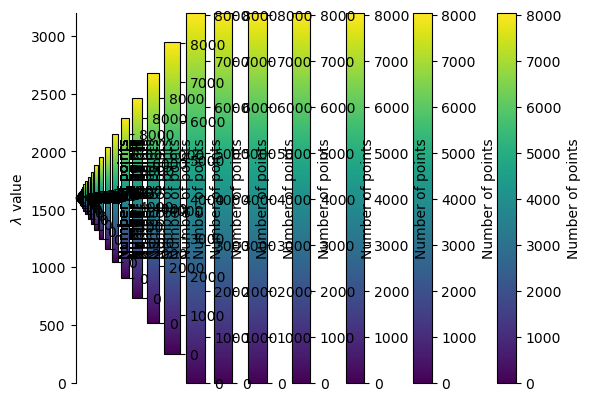

In [3]:
import cluster_data_a
from cluster_data_a import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from HDBSCAN import hdbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_a import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_a.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data_a.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

images_dir = "Images"
os.makedirs(images_dir, exist_ok=True)
plot_dir = os.path.join("Images", "hdbscan_simulations_running_bins_a")
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning HDBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.sem_maj]).T
    feature_names = ["inclination [°]", "RAAN [°]", "semi major axis [km]"]
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_cluster_size_values = [10, 15]  
    min_samples_values = [None, 10] 
    cluster_selection_epsilon_values = [0.0, 0.1] 

    results = []

    for min_cluster_size in min_cluster_size_values: 
        for min_samples in min_samples_values:
            for cluster_selection_epsilon in cluster_selection_epsilon_values:

                result_hdbscan, time_hdbscan, n_clusters_hdbscan, points_per_cluster_hdbscan, metrics_hdbscan = run_clustering(
                    hdbscan_clustering, "HDBSCAN", normalized_data, data_min, data_max, min_cluster_size, min_samples, cluster_selection_epsilon, plot_condensed_tree=True, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_hdbscan.data, result_hdbscan.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_hdbscan.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"hdbscan_{year_range}_minclust{min_cluster_size}_minsamples{min_samples}_epsilon{cluster_selection_epsilon}.png")
                title = f"HDBSCAN: years = {year_range}, min_cluster_size: {min_cluster_size}, min_samples: {min_samples}, epsilon: {cluster_selection_epsilon},"
                plotter.clusters_3d_plot(title, plot_filename, feature_names=feature_names, reverse_third_axis=True)

                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_hdbscan[4].items()}

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_hdbscan,
                    "Runtime (s)": f"{time_hdbscan:.3f}",
                    "Clusters": n_clusters_hdbscan,
                    "Points per Cluster": points_per_cluster_hdbscan,
                    "Davies-Bouldin": f"{metrics_hdbscan[0]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_hdbscan[1]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_hdbscan[2]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_hdbscan[3]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)